In [65]:
pip install stanza

In [66]:
import stanza

In [4]:
stanza.download('grc')

2020-12-01 00:42:46 INFO: Downloading default packages for language: grc (Ancient_Greek)...
2020-12-01 00:42:59 INFO: Finished downloading models and saved to /root/stanza_resources.


In [5]:
import pandas as pd 
import gensim
from gensim import corpora,models
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer #tokenizes and counts words
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()
from sklearn import metrics
import requests
from sklearn.feature_selection import RFE, chi2
from scipy.spatial import distance
from pandas.core.frame import DataFrame
from nltk import FreqDist
from sklearn.metrics.pairwise import cosine_similarity
from gensim.matutils import kullback_leibler, jaccard, hellinger, sparse2full
import string
from scipy.stats import entropy
from numpy.linalg import norm
from scipy.spatial import distance
import spacy
from collections import Counter

In [6]:
from spacy.lang.el import Greek

In [7]:
import os
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)


Mounted at /content/drive


['Getting started.pdf',
 'image (1).jpg',
 'image.jpg',
 'C347414E-901F-4ADD-A460-3B99C03799B4.png',
 'Introduction to Scientific Programming and Simulation Using R.pdf',
 'RDataScience(1).pdf',
 'database group project.gdoc',
 'Database Data.gsheet',
 'Text Analytics Phase 1.gslides',
 '2018GMAT课件',
 'Untitled presentation (1).gslides',
 '9526f2636c319b9ed60bdc9c605f7725.mp4',
 'Camera Roll.zip',
 'WIN_20200323_11_22_38_Pro.mp4',
 'Untitled spreadsheet.gsheet',
 'Big Data Analytics Proposal.gslides',
 'Discover the correlation between Public transportation facilities investment and the frequency of Traffic accident in United States.gdoc',
 'Untitled presentation.gslides',
 'gmat.exe',
 'Web Analytics.zip',
 'Data Mining.zip',
 'datamodeler-19.2.0.182.1216-x64.zip',
 'Bootcamp 课件.zip',
 'Torrey (1911).pdf',
 'Torrey (1911).gdoc',
 'Bootcamp 课件 (1).zip',
 'Bible_Data.csv',
 'OtherApostlesWork_Data.csv',
 'Colab Notebooks',
 'drive',
 'Peter word_count.jpg',
 'John word_count.jpg',
 'Jud

In [8]:
!pip install sklearn

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM


from sklearn.datasets import fetch_20newsgroups

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from random import random
from numpy import array
from numpy import cumsum
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
max_features = 100
seq_length = 20
batch_size = 32

In [11]:
stanza.download('el')
nlp = stanza.Pipeline(lang='el', processors='tokenize,pos,mwt,lemma', tokenize_pretokenized=True)

2020-12-01 00:43:53 INFO: Downloading default packages for language: el (Greek)...
2020-12-01 00:44:07 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-12-01 00:44:07 INFO: Loading these models for language: el (Greek):
| Processor | Package |
-----------------------
| tokenize  | gdt     |
| mwt       | gdt     |
| pos       | gdt     |
| lemma     | gdt     |

2020-12-01 00:44:07 INFO: Use device: cpu
2020-12-01 00:44:07 INFO: Loading: tokenize
2020-12-01 00:44:07 INFO: Loading: mwt
2020-12-01 00:44:07 INFO: Loading: pos
2020-12-01 00:44:08 INFO: Loading: lemma
2020-12-01 00:44:08 INFO: Done loading processors!


In [12]:
df = pd.read_csv('NA28_11_09_11PM.csv', encoding = 'utf-16', sep = '\t')
df2 = pd.read_csv('SBL_11_09_11PM.csv', encoding = 'utf-16', sep = '\t')
df3 = pd.read_csv('Tyndale_11_09_11PM.csv', encoding = 'utf-16', sep = '\t')

In [13]:
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="relu")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         12800     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 210,561
Trainable params: 210,561
Non-trainable params: 0
_________________________________________________________________


In [14]:
def cosine_text(text):
    pos_tag = []
    for t in text['Verse']:
        pos_tag.append(nlp(t).get('pos'))
    for y in Heb['Verse']:
        pos_tag.append(nlp(y).get('pos'))
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(pos_tag)
    sequences_train = tokenizer.texts_to_sequences(pos_tag)
    word_index = tokenizer.word_index
    x_train = pad_sequences(sequences_train, maxlen=seq_length)
    return x_train

In [15]:
def text_author(text):
    author_tag = []
    for t in text['Author']:
        author_tag.append(1)
    for f in Heb['Author']:
        author_tag.append(0)
    my_array = np.array(author_tag)
    return my_array

In [16]:
def model_output(rnntext,rnntext2):

  X_train, X_test, y_train, y_test = train_test_split(rnntext, rnntext2, test_size = 0.2)
  model.compile("rmsprop", "binary_crossentropy", metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
  return history

## NA28_version

In [ ]:
Matthew = df[df.BookName == 'Mt']
Matthew['Author'] = 'Matthew'
Mark = df[df.BookName == 'Mk']
Mark['Author'] = 'Mark'
Luke = df[df.BookName == 'Lk']
Luke['Author'] = 'Luke'
John = df[df.BookName == 'Joh']
John['Author'] = 'John'
Acts = df[df.BookName == 'Apg']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df[df.BookName == 'Jak']
James['Author'] = 'James'
f_Peter = df[df.BookName == '1.Petr']
s_Peter = df[df.BookName == '2.Petr']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df[df.BookName == '1.Joh']
s_John = df[df.BookName == '2.Joh']
t_John = df[df.BookName == '3.Joh']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df[df.BookName == 'Jud']
Jude['Author'] = 'Jude'
Rev = df[df.BookName == 'Offb']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [ ]:
Romans = df[df.BookName == 'Röm']
Romans['Author'] = 'Paul'
f_cor = df[df.BookName == '1.Kor']
f_cor['Author'] = 'Paul'
s_cor = df[df.BookName == '2.Kor']
s_cor['Author'] = 'Paul'
Gal = df[df.BookName == 'Gal']
Gal['Author'] = 'Paul'
Eph = df[df.BookName == 'Eph']
Eph['Author'] = 'Paul'
Phi = df[df.BookName == 'Phil']
Phi['Author'] = 'Paul'
Col = df[df.BookName == 'Kol']
Col['Author'] = 'Paul'
f_the = df[df.BookName == '1.Thess']
f_the['Author'] = 'Paul'
s_the = df[df.BookName == '2.Thess']
s_the['Author'] = 'Paul'
f_tim = df[df.BookName == '1.Tim']
f_tim['Author'] = 'Paul'
s_tim = df[df.BookName == '2.Tim']
s_tim['Author'] = 'Paul'
Titus = df[df.BookName == 'Tit']
Titus['Author'] = 'Paul'
Philemon = df[df.BookName == 'Phlm']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df[df.BookName == 'heb']
Heb['Author'] = 'Paul?'

In [ ]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [ ]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [ ]:
mat = model_output(g1,g11)

Epoch 1/20
34/34 [==============================] - 3s 96ms/step - loss: 0.9679 - accuracy: 0.5933 - val_loss: 1.0583 - val_accuracy: 0.2360
Epoch 2/20
34/34 [==============================] - 2s 51ms/step - loss: 0.6717 - accuracy: 0.6186 - val_loss: 0.5184 - val_accuracy: 0.7640
Epoch 3/20
34/34 [==============================] - 2s 50ms/step - loss: 0.6026 - accuracy: 0.7029 - val_loss: 0.6671 - val_accuracy: 0.7640
Epoch 4/20
34/34 [==============================] - 2s 52ms/step - loss: 0.5972 - accuracy: 0.7179 - val_loss: 0.6523 - val_accuracy: 0.6180
Epoch 5/20
34/34 [==============================] - 2s 51ms/step - loss: 0.5237 - accuracy: 0.7873 - val_loss: 0.7318 - val_accuracy: 0.7678
Epoch 6/20
34/34 [==============================] - 2s 51ms/step - loss: 0.6107 - accuracy: 0.7638 - val_loss: 0.5355 - val_accuracy: 0.7640
Epoch 7/20
34/34 [==============================] - 2s 50ms/step - loss: 0.5742 - accuracy: 0.7498 - val_loss: 0.6942 - val_accuracy: 0.7640
Epoch 8/20
34

In [ ]:
mak = model_output(g2,g21)

Epoch 1/20
24/24 [==============================] - 3s 124ms/step - loss: 0.6350 - accuracy: 0.6873 - val_loss: 0.5610 - val_accuracy: 0.7211
Epoch 2/20
24/24 [==============================] - 1s 51ms/step - loss: 0.5677 - accuracy: 0.7111 - val_loss: 0.5573 - val_accuracy: 0.7105
Epoch 3/20
24/24 [==============================] - 1s 50ms/step - loss: 0.5971 - accuracy: 0.7164 - val_loss: 0.5494 - val_accuracy: 0.7211
Epoch 4/20
24/24 [==============================] - 1s 52ms/step - loss: 0.5669 - accuracy: 0.7177 - val_loss: 0.5566 - val_accuracy: 0.7158
Epoch 5/20
24/24 [==============================] - 1s 51ms/step - loss: 0.6186 - accuracy: 0.7177 - val_loss: 0.5626 - val_accuracy: 0.7211
Epoch 6/20
24/24 [==============================] - 1s 54ms/step - loss: 0.6592 - accuracy: 0.7111 - val_loss: 0.5559 - val_accuracy: 0.7263
Epoch 7/20
24/24 [==============================] - 1s 54ms/step - loss: 0.5919 - accuracy: 0.7348 - val_loss: 1.3361 - val_accuracy: 0.7053
Epoch 8/20
2

In [ ]:
luk = model_output(g3,g31)

Epoch 1/20
36/36 [==============================] - 3s 93ms/step - loss: 0.4842 - accuracy: 0.7923 - val_loss: 0.4276 - val_accuracy: 0.8182
Epoch 2/20
36/36 [==============================] - 2s 50ms/step - loss: 0.4849 - accuracy: 0.7932 - val_loss: 0.4347 - val_accuracy: 0.8182
Epoch 3/20
36/36 [==============================] - 2s 52ms/step - loss: 0.5054 - accuracy: 0.8011 - val_loss: 0.4384 - val_accuracy: 0.8077
Epoch 4/20
36/36 [==============================] - 2s 50ms/step - loss: 0.5335 - accuracy: 0.7958 - val_loss: 0.4679 - val_accuracy: 0.8217
Epoch 5/20
36/36 [==============================] - 2s 51ms/step - loss: 0.5113 - accuracy: 0.7975 - val_loss: 0.4242 - val_accuracy: 0.8182
Epoch 6/20
36/36 [==============================] - 2s 51ms/step - loss: 0.4912 - accuracy: 0.7967 - val_loss: 0.4174 - val_accuracy: 0.8217
Epoch 7/20
36/36 [==============================] - 2s 51ms/step - loss: 0.4706 - accuracy: 0.8019 - val_loss: 0.5511 - val_accuracy: 0.8182
Epoch 8/20
36

In [ ]:
joh = model_output(g4,g41)

Epoch 1/20
29/29 [==============================] - 3s 93ms/step - loss: 0.6156 - accuracy: 0.7705 - val_loss: 0.5505 - val_accuracy: 0.7672
Epoch 2/20
29/29 [==============================] - 1s 43ms/step - loss: 0.5059 - accuracy: 0.7759 - val_loss: 0.7720 - val_accuracy: 0.7672
Epoch 3/20
29/29 [==============================] - 1s 43ms/step - loss: 0.5622 - accuracy: 0.7812 - val_loss: 0.4867 - val_accuracy: 0.7759
Epoch 4/20
29/29 [==============================] - 1s 43ms/step - loss: 0.4866 - accuracy: 0.7931 - val_loss: 0.5410 - val_accuracy: 0.7672
Epoch 5/20
29/29 [==============================] - 1s 45ms/step - loss: 0.5086 - accuracy: 0.7996 - val_loss: 0.7162 - val_accuracy: 0.7586
Epoch 6/20
29/29 [==============================] - 1s 43ms/step - loss: 0.5452 - accuracy: 0.8103 - val_loss: 0.7945 - val_accuracy: 0.7716
Epoch 7/20
29/29 [==============================] - 1s 43ms/step - loss: 0.5076 - accuracy: 0.8082 - val_loss: 0.4856 - val_accuracy: 0.7759
Epoch 8/20
29

In [ ]:
act = model_output(acts,acts1)

Epoch 1/20
32/32 [==============================] - 3s 106ms/step - loss: 0.6888 - accuracy: 0.7475 - val_loss: 0.5844 - val_accuracy: 0.7826
Epoch 2/20
32/32 [==============================] - 2s 49ms/step - loss: 0.6088 - accuracy: 0.7733 - val_loss: 0.6582 - val_accuracy: 0.8024
Epoch 3/20
32/32 [==============================] - 2s 55ms/step - loss: 0.5758 - accuracy: 0.7851 - val_loss: 0.5439 - val_accuracy: 0.7787
Epoch 4/20
32/32 [==============================] - 2s 52ms/step - loss: 0.5673 - accuracy: 0.7802 - val_loss: 0.5978 - val_accuracy: 0.7470
Epoch 5/20
32/32 [==============================] - 2s 53ms/step - loss: 0.5784 - accuracy: 0.7822 - val_loss: 0.6037 - val_accuracy: 0.7826
Epoch 6/20
32/32 [==============================] - 2s 53ms/step - loss: 0.5264 - accuracy: 0.7802 - val_loss: 0.9573 - val_accuracy: 0.7945
Epoch 7/20
32/32 [==============================] - 2s 58ms/step - loss: 0.5119 - accuracy: 0.7941 - val_loss: 0.7534 - val_accuracy: 0.7905
Epoch 8/20
3

In [ ]:
rom = model_output(rms,rms1)

Epoch 1/20
18/18 [==============================] - 2s 126ms/step - loss: 0.9406 - accuracy: 0.6745 - val_loss: 0.9332 - val_accuracy: 0.7357
Epoch 2/20
18/18 [==============================] - 1s 48ms/step - loss: 0.6294 - accuracy: 0.6871 - val_loss: 0.9670 - val_accuracy: 0.6786
Epoch 3/20
18/18 [==============================] - 1s 48ms/step - loss: 0.6117 - accuracy: 0.7158 - val_loss: 1.0703 - val_accuracy: 0.6643
Epoch 4/20
18/18 [==============================] - 1s 49ms/step - loss: 0.7385 - accuracy: 0.7086 - val_loss: 0.8681 - val_accuracy: 0.6929
Epoch 5/20
18/18 [==============================] - 1s 48ms/step - loss: 0.5988 - accuracy: 0.7212 - val_loss: 0.8454 - val_accuracy: 0.6786
Epoch 6/20
18/18 [==============================] - 1s 49ms/step - loss: 0.5097 - accuracy: 0.7536 - val_loss: 1.0264 - val_accuracy: 0.7143
Epoch 7/20
18/18 [==============================] - 1s 50ms/step - loss: 0.4949 - accuracy: 0.7644 - val_loss: 1.1490 - val_accuracy: 0.6714
Epoch 8/20
1

In [ ]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
18/18 [==============================] - 2s 129ms/step - loss: 1.4264 - accuracy: 0.7570 - val_loss: 1.2182 - val_accuracy: 0.6806
Epoch 2/20
18/18 [==============================] - 1s 50ms/step - loss: 0.9529 - accuracy: 0.7937 - val_loss: 1.1743 - val_accuracy: 0.6667
Epoch 3/20
18/18 [==============================] - 1s 49ms/step - loss: 1.0672 - accuracy: 0.7605 - val_loss: 1.6307 - val_accuracy: 0.6111
Epoch 4/20
18/18 [==============================] - 1s 49ms/step - loss: 0.9782 - accuracy: 0.7622 - val_loss: 1.5690 - val_accuracy: 0.6042
Epoch 5/20
18/18 [==============================] - 1s 51ms/step - loss: 0.9296 - accuracy: 0.7535 - val_loss: 1.4117 - val_accuracy: 0.6319
Epoch 6/20
18/18 [==============================] - 1s 51ms/step - loss: 0.7957 - accuracy: 0.7832 - val_loss: 1.2592 - val_accuracy: 0.6597
Epoch 7/20
18/18 [==============================] - 1s 50ms/step - loss: 0.7653 - accuracy: 0.8077 - val_loss: 1.1603 - val_accuracy: 0.6736
Epoch 8/20
1

In [ ]:
scr = model_output(scor,scor1)

Epoch 1/20
14/14 [==============================] - 2s 153ms/step - loss: 1.4008 - accuracy: 0.7953 - val_loss: 1.4963 - val_accuracy: 0.7685
Epoch 2/20
14/14 [==============================] - 1s 50ms/step - loss: 1.1193 - accuracy: 0.8395 - val_loss: 1.3737 - val_accuracy: 0.7870
Epoch 3/20
14/14 [==============================] - 1s 53ms/step - loss: 0.9431 - accuracy: 0.8558 - val_loss: 1.4919 - val_accuracy: 0.8241
Epoch 4/20
14/14 [==============================] - 1s 48ms/step - loss: 0.8528 - accuracy: 0.8651 - val_loss: 1.1773 - val_accuracy: 0.8056
Epoch 5/20
14/14 [==============================] - 1s 48ms/step - loss: 0.7806 - accuracy: 0.8860 - val_loss: 1.4174 - val_accuracy: 0.8148
Epoch 6/20
14/14 [==============================] - 1s 51ms/step - loss: 0.7114 - accuracy: 0.9023 - val_loss: 1.6525 - val_accuracy: 0.7963
Epoch 7/20
14/14 [==============================] - 1s 47ms/step - loss: 0.7334 - accuracy: 0.9093 - val_loss: 1.6090 - val_accuracy: 0.7778
Epoch 8/20
1

In [ ]:
glt = model_output(gal,gal1)

Epoch 1/20
11/11 [==============================] - 2s 190ms/step - loss: 2.8834 - accuracy: 0.7217 - val_loss: 3.3539 - val_accuracy: 0.6322
Epoch 2/20
11/11 [==============================] - 1s 48ms/step - loss: 2.8597 - accuracy: 0.7159 - val_loss: 3.0099 - val_accuracy: 0.6897
Epoch 3/20
11/11 [==============================] - 1s 48ms/step - loss: 2.5169 - accuracy: 0.7594 - val_loss: 3.1014 - val_accuracy: 0.6667
Epoch 4/20
11/11 [==============================] - 1s 50ms/step - loss: 2.2063 - accuracy: 0.7884 - val_loss: 3.3167 - val_accuracy: 0.7011
Epoch 5/20
11/11 [==============================] - 1s 47ms/step - loss: 1.9871 - accuracy: 0.8058 - val_loss: 3.0143 - val_accuracy: 0.7126
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.7906 - accuracy: 0.8290 - val_loss: 2.8667 - val_accuracy: 0.7011
Epoch 7/20
11/11 [==============================] - 1s 49ms/step - loss: 1.3490 - accuracy: 0.8754 - val_loss: 2.6837 - val_accuracy: 0.7471
Epoch 8/20
1

In [ ]:
ept = model_output(eph,eph1)

Epoch 1/20
11/11 [==============================] - 2s 182ms/step - loss: 2.3673 - accuracy: 0.7349 - val_loss: 2.2559 - val_accuracy: 0.7701
Epoch 2/20
11/11 [==============================] - 1s 50ms/step - loss: 1.8060 - accuracy: 0.7925 - val_loss: 2.0176 - val_accuracy: 0.7356
Epoch 3/20
11/11 [==============================] - 1s 53ms/step - loss: 1.6928 - accuracy: 0.8329 - val_loss: 1.8418 - val_accuracy: 0.7241
Epoch 4/20
11/11 [==============================] - 1s 48ms/step - loss: 1.4696 - accuracy: 0.8444 - val_loss: 2.0096 - val_accuracy: 0.7701
Epoch 5/20
11/11 [==============================] - 1s 53ms/step - loss: 1.3489 - accuracy: 0.8674 - val_loss: 1.6232 - val_accuracy: 0.7931
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.2597 - accuracy: 0.8559 - val_loss: 1.6681 - val_accuracy: 0.7816
Epoch 7/20
11/11 [==============================] - 1s 49ms/step - loss: 1.0656 - accuracy: 0.8963 - val_loss: 1.8524 - val_accuracy: 0.7931
Epoch 8/20
1

In [ ]:
plp = model_output(phi,phi1)

Epoch 1/20
10/10 [==============================] - 2s 193ms/step - loss: 1.6706 - accuracy: 0.8285 - val_loss: 2.0598 - val_accuracy: 0.8205
Epoch 2/20
10/10 [==============================] - 1s 51ms/step - loss: 1.1054 - accuracy: 0.8770 - val_loss: 1.9248 - val_accuracy: 0.7821
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 1.2664 - accuracy: 0.8382 - val_loss: 1.5142 - val_accuracy: 0.8333
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 1.0220 - accuracy: 0.8770 - val_loss: 1.4962 - val_accuracy: 0.8462
Epoch 5/20
10/10 [==============================] - 0s 49ms/step - loss: 0.9192 - accuracy: 0.9126 - val_loss: 1.4987 - val_accuracy: 0.8462
Epoch 6/20
10/10 [==============================] - 0s 48ms/step - loss: 0.8951 - accuracy: 0.9353 - val_loss: 1.4934 - val_accuracy: 0.8462
Epoch 7/20
10/10 [==============================] - 0s 49ms/step - loss: 0.8783 - accuracy: 0.9385 - val_loss: 1.4913 - val_accuracy: 0.8462
Epoch 8/20
1

In [ ]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 196ms/step - loss: 1.1693 - accuracy: 0.8444 - val_loss: 0.9015 - val_accuracy: 0.9079
Epoch 2/20
10/10 [==============================] - 0s 45ms/step - loss: 0.9438 - accuracy: 0.9073 - val_loss: 0.9772 - val_accuracy: 0.8684
Epoch 3/20
10/10 [==============================] - 0s 46ms/step - loss: 0.7666 - accuracy: 0.9272 - val_loss: 0.9203 - val_accuracy: 0.8816
Epoch 4/20
10/10 [==============================] - 0s 45ms/step - loss: 0.6531 - accuracy: 0.9470 - val_loss: 0.9080 - val_accuracy: 0.8947
Epoch 5/20
10/10 [==============================] - 0s 48ms/step - loss: 0.6885 - accuracy: 0.9470 - val_loss: 0.9530 - val_accuracy: 0.8816
Epoch 6/20
10/10 [==============================] - 0s 45ms/step - loss: 0.6375 - accuracy: 0.9404 - val_loss: 1.0881 - val_accuracy: 0.8947
Epoch 7/20
10/10 [==============================] - 0s 48ms/step - loss: 0.6249 - accuracy: 0.9570 - val_loss: 1.1375 - val_accuracy: 0.8947
Epoch 8/20
1

In [ ]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 2s 192ms/step - loss: 2.3947 - accuracy: 0.7912 - val_loss: 2.3281 - val_accuracy: 0.7867
Epoch 2/20
10/10 [==============================] - 0s 48ms/step - loss: 1.8358 - accuracy: 0.8350 - val_loss: 2.7219 - val_accuracy: 0.7867
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 1.6730 - accuracy: 0.8620 - val_loss: 2.5414 - val_accuracy: 0.8000
Epoch 4/20
10/10 [==============================] - 0s 46ms/step - loss: 1.5956 - accuracy: 0.8822 - val_loss: 2.5172 - val_accuracy: 0.8000
Epoch 5/20
10/10 [==============================] - 0s 47ms/step - loss: 1.5155 - accuracy: 0.8788 - val_loss: 2.5331 - val_accuracy: 0.8133
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 1.5438 - accuracy: 0.8889 - val_loss: 2.3516 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 0s 46ms/step - loss: 1.5176 - accuracy: 0.8990 - val_loss: 2.3472 - val_accuracy: 0.8267
Epoch 8/20
1

In [ ]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 2s 205ms/step - loss: 1.6395 - accuracy: 0.8674 - val_loss: 1.4102 - val_accuracy: 0.9091
Epoch 2/20
9/9 [==============================] - 0s 45ms/step - loss: 1.6515 - accuracy: 0.8864 - val_loss: 1.2319 - val_accuracy: 0.8939
Epoch 3/20
9/9 [==============================] - 0s 47ms/step - loss: 1.6539 - accuracy: 0.8864 - val_loss: 1.2288 - val_accuracy: 0.8939
Epoch 4/20
9/9 [==============================] - 0s 46ms/step - loss: 1.3444 - accuracy: 0.8788 - val_loss: 1.2783 - val_accuracy: 0.8636
Epoch 5/20
9/9 [==============================] - 0s 46ms/step - loss: 1.2933 - accuracy: 0.9129 - val_loss: 1.2270 - val_accuracy: 0.8939
Epoch 6/20
9/9 [==============================] - 0s 48ms/step - loss: 1.1837 - accuracy: 0.9167 - val_loss: 1.2416 - val_accuracy: 0.8939
Epoch 7/20
9/9 [==============================] - 0s 49ms/step - loss: 1.1830 - accuracy: 0.9167 - val_loss: 1.0096 - val_accuracy: 0.8939
Epoch 8/20
9/9 [==========

In [ ]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
10/10 [==============================] - 2s 196ms/step - loss: 2.8537 - accuracy: 0.7848 - val_loss: 2.7646 - val_accuracy: 0.6875
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 2.7639 - accuracy: 0.7690 - val_loss: 2.5257 - val_accuracy: 0.7250
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 2.2067 - accuracy: 0.8006 - val_loss: 2.2857 - val_accuracy: 0.7875
Epoch 4/20
10/10 [==============================] - 0s 48ms/step - loss: 2.0709 - accuracy: 0.8386 - val_loss: 2.4300 - val_accuracy: 0.7875
Epoch 5/20
10/10 [==============================] - 0s 46ms/step - loss: 1.9951 - accuracy: 0.8513 - val_loss: 2.2726 - val_accuracy: 0.8000
Epoch 6/20
10/10 [==============================] - 0s 49ms/step - loss: 1.9295 - accuracy: 0.8671 - val_loss: 2.4947 - val_accuracy: 0.7250
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 1.8859 - accuracy: 0.8513 - val_loss: 2.3208 - val_accuracy: 0.7625
Epoch 8/20
1

In [ ]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 201ms/step - loss: 1.9141 - accuracy: 0.8219 - val_loss: 1.9985 - val_accuracy: 0.7973
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 1.7318 - accuracy: 0.8767 - val_loss: 1.4356 - val_accuracy: 0.8378
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 1.3939 - accuracy: 0.8562 - val_loss: 1.8473 - val_accuracy: 0.8243
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 1.3999 - accuracy: 0.8870 - val_loss: 2.0021 - val_accuracy: 0.8243
Epoch 5/20
10/10 [==============================] - 1s 76ms/step - loss: 1.2172 - accuracy: 0.8973 - val_loss: 1.8233 - val_accuracy: 0.8108
Epoch 6/20
10/10 [==============================] - 1s 81ms/step - loss: 1.1794 - accuracy: 0.9144 - val_loss: 1.8391 - val_accuracy: 0.8243
Epoch 7/20
10/10 [==============================] - 1s 52ms/step - loss: 1.1723 - accuracy: 0.9144 - val_loss: 1.6929 - val_accuracy: 0.8243
Epoch 8/20
1

In [ ]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 201ms/step - loss: 1.6746 - accuracy: 0.8631 - val_loss: 2.7171 - val_accuracy: 0.7424
Epoch 2/20
9/9 [==============================] - 0s 44ms/step - loss: 1.8644 - accuracy: 0.8175 - val_loss: 2.3872 - val_accuracy: 0.8182
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 1.4950 - accuracy: 0.8859 - val_loss: 1.9626 - val_accuracy: 0.8182
Epoch 4/20
9/9 [==============================] - 0s 47ms/step - loss: 1.1975 - accuracy: 0.9087 - val_loss: 1.9175 - val_accuracy: 0.8485
Epoch 5/20
9/9 [==============================] - 0s 46ms/step - loss: 1.1258 - accuracy: 0.9240 - val_loss: 1.9159 - val_accuracy: 0.8485
Epoch 6/20
9/9 [==============================] - 0s 47ms/step - loss: 1.1139 - accuracy: 0.9278 - val_loss: 1.9158 - val_accuracy: 0.8485
Epoch 7/20
9/9 [==============================] - 0s 46ms/step - loss: 1.1122 - accuracy: 0.9278 - val_loss: 1.7069 - val_accuracy: 0.8485
Epoch 8/20
9/9 [==========

In [ ]:
plm = model_output(philemon,philemon1)

Epoch 1/20
8/8 [==============================] - 2s 235ms/step - loss: 1.0486 - accuracy: 0.9268 - val_loss: 0.7601 - val_accuracy: 0.9355
Epoch 2/20
8/8 [==============================] - 0s 46ms/step - loss: 1.1443 - accuracy: 0.9228 - val_loss: 0.5565 - val_accuracy: 0.9194
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 1.1396 - accuracy: 0.9187 - val_loss: 0.4753 - val_accuracy: 0.9194
Epoch 4/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0743 - accuracy: 0.9268 - val_loss: 0.5393 - val_accuracy: 0.9355
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 1.0647 - accuracy: 0.9309 - val_loss: 0.5289 - val_accuracy: 0.9516
Epoch 6/20
8/8 [==============================] - 0s 46ms/step - loss: 1.0624 - accuracy: 0.9309 - val_loss: 0.5289 - val_accuracy: 0.9516
Epoch 7/20
8/8 [==============================] - 0s 48ms/step - loss: 1.0624 - accuracy: 0.9309 - val_loss: 0.5289 - val_accuracy: 0.9516
Epoch 8/20
8/8 [==========

In [ ]:
jam = model_output(jams,jams1)

Epoch 1/20
10/10 [==============================] - 2s 192ms/step - loss: 2.8494 - accuracy: 0.7500 - val_loss: 1.0912 - val_accuracy: 0.8608
Epoch 2/20
10/10 [==============================] - 0s 48ms/step - loss: 2.0196 - accuracy: 0.8045 - val_loss: 2.0159 - val_accuracy: 0.8228
Epoch 3/20
10/10 [==============================] - 1s 53ms/step - loss: 1.9961 - accuracy: 0.8429 - val_loss: 1.6784 - val_accuracy: 0.8354
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 1.9397 - accuracy: 0.8686 - val_loss: 1.7139 - val_accuracy: 0.8354
Epoch 5/20
10/10 [==============================] - 0s 48ms/step - loss: 1.8927 - accuracy: 0.8654 - val_loss: 1.0830 - val_accuracy: 0.8987
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 1.5210 - accuracy: 0.8750 - val_loss: 1.2837 - val_accuracy: 0.8861
Epoch 7/20
10/10 [==============================] - 0s 50ms/step - loss: 1.2224 - accuracy: 0.8846 - val_loss: 1.2544 - val_accuracy: 0.8734
Epoch 8/20
1

In [ ]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
10/10 [==============================] - 2s 189ms/step - loss: 1.4511 - accuracy: 0.8562 - val_loss: 1.8546 - val_accuracy: 0.8701
Epoch 2/20
10/10 [==============================] - 1s 55ms/step - loss: 1.1935 - accuracy: 0.9085 - val_loss: 1.7016 - val_accuracy: 0.8442
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 0.9445 - accuracy: 0.8987 - val_loss: 1.7333 - val_accuracy: 0.8312
Epoch 4/20
10/10 [==============================] - 0s 49ms/step - loss: 0.9138 - accuracy: 0.9118 - val_loss: 1.7108 - val_accuracy: 0.7532
Epoch 5/20
10/10 [==============================] - 0s 46ms/step - loss: 0.6635 - accuracy: 0.9314 - val_loss: 1.6510 - val_accuracy: 0.7792
Epoch 6/20
10/10 [==============================] - 0s 48ms/step - loss: 0.4635 - accuracy: 0.9412 - val_loss: 1.5324 - val_accuracy: 0.8571
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 0.4386 - accuracy: 0.9641 - val_loss: 1.5325 - val_accuracy: 0.8442
Epoch 8/20
1

In [ ]:
spt = model_output(spet,spet1)

Epoch 1/20
9/9 [==============================] - 4s 399ms/step - loss: 1.7220 - accuracy: 0.8504 - val_loss: 0.9326 - val_accuracy: 0.9275
Epoch 2/20
9/9 [==============================] - 0s 48ms/step - loss: 1.6193 - accuracy: 0.8759 - val_loss: 0.7091 - val_accuracy: 0.9420
Epoch 3/20
9/9 [==============================] - 0s 47ms/step - loss: 1.5794 - accuracy: 0.8978 - val_loss: 0.6979 - val_accuracy: 0.9565
Epoch 4/20
9/9 [==============================] - 0s 47ms/step - loss: 1.5750 - accuracy: 0.8978 - val_loss: 0.6980 - val_accuracy: 0.9565
Epoch 5/20
9/9 [==============================] - 0s 48ms/step - loss: 1.5743 - accuracy: 0.8978 - val_loss: 0.6980 - val_accuracy: 0.9565
Epoch 6/20
9/9 [==============================] - 0s 50ms/step - loss: 1.5743 - accuracy: 0.8978 - val_loss: 0.6980 - val_accuracy: 0.9565
Epoch 7/20
9/9 [==============================] - 0s 47ms/step - loss: 1.5743 - accuracy: 0.8978 - val_loss: 0.6980 - val_accuracy: 0.9565
Epoch 8/20
9/9 [==========

In [ ]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
10/10 [==============================] - 2s 196ms/step - loss: 1.6470 - accuracy: 0.8355 - val_loss: 1.1105 - val_accuracy: 0.8846
Epoch 2/20
10/10 [==============================] - 0s 50ms/step - loss: 1.2013 - accuracy: 0.9000 - val_loss: 1.0829 - val_accuracy: 0.8974
Epoch 3/20
10/10 [==============================] - 1s 50ms/step - loss: 1.0508 - accuracy: 0.9290 - val_loss: 0.9923 - val_accuracy: 0.8718
Epoch 4/20
10/10 [==============================] - 0s 48ms/step - loss: 1.0447 - accuracy: 0.9323 - val_loss: 0.9790 - val_accuracy: 0.8718
Epoch 5/20
10/10 [==============================] - 0s 49ms/step - loss: 1.0445 - accuracy: 0.9323 - val_loss: 1.1672 - val_accuracy: 0.8718
Epoch 6/20
10/10 [==============================] - 0s 47ms/step - loss: 1.0471 - accuracy: 0.9323 - val_loss: 1.1051 - val_accuracy: 0.8718
Epoch 7/20
10/10 [==============================] - 0s 48ms/step - loss: 0.9969 - accuracy: 0.9355 - val_loss: 1.4374 - val_accuracy: 0.8974
Epoch 8/20
1

In [ ]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 228ms/step - loss: 0.2316 - accuracy: 0.9788 - val_loss: 1.4763 - val_accuracy: 0.8333
Epoch 2/20
8/8 [==============================] - 0s 47ms/step - loss: 0.7433 - accuracy: 0.9407 - val_loss: 1.2824 - val_accuracy: 0.9167
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 0.2975 - accuracy: 0.9661 - val_loss: 0.8402 - val_accuracy: 0.9167
Epoch 4/20
8/8 [==============================] - 0s 52ms/step - loss: 0.2649 - accuracy: 0.9788 - val_loss: 1.0443 - val_accuracy: 0.9167
Epoch 5/20
8/8 [==============================] - 0s 48ms/step - loss: 0.2626 - accuracy: 0.9831 - val_loss: 1.0466 - val_accuracy: 0.9167
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.2612 - accuracy: 0.9831 - val_loss: 0.8551 - val_accuracy: 0.9167
Epoch 7/20
8/8 [==============================] - 0s 48ms/step - loss: 0.2612 - accuracy: 0.9831 - val_loss: 1.0600 - val_accuracy: 0.9167
Epoch 8/20
8/8 [==========

In [ ]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 227ms/step - loss: 0.6270 - accuracy: 0.9412 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.5851 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 3/20
8/8 [==============================] - 0s 47ms/step - loss: 0.5841 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 4/20
8/8 [==============================] - 0s 48ms/step - loss: 0.5826 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 5/20
8/8 [==============================] - 0s 47ms/step - loss: 0.5826 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 6/20
8/8 [==============================] - 0s 48ms/step - loss: 0.5826 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 7/20
8/8 [==============================] - 0s 43ms/step - loss: 0.5826 - accuracy: 0.9622 - val_loss: 0.5142 - val_accuracy: 0.9667
Epoch 8/20
8/8 [==========

In [ ]:
jde = model_output(jud,jud1)

Epoch 1/20
8/8 [==============================] - 2s 229ms/step - loss: 1.1395 - accuracy: 0.9228 - val_loss: 0.2851 - val_accuracy: 0.9677
Epoch 2/20
8/8 [==============================] - 0s 49ms/step - loss: 1.1292 - accuracy: 0.9268 - val_loss: 0.3020 - val_accuracy: 0.9516
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 1.0796 - accuracy: 0.9268 - val_loss: 0.5138 - val_accuracy: 0.9516
Epoch 4/20
8/8 [==============================] - 0s 50ms/step - loss: 1.0731 - accuracy: 0.9268 - val_loss: 0.5102 - val_accuracy: 0.9677
Epoch 5/20
8/8 [==============================] - 0s 53ms/step - loss: 1.0664 - accuracy: 0.9309 - val_loss: 0.5105 - val_accuracy: 0.9677
Epoch 6/20
8/8 [==============================] - 0s 50ms/step - loss: 1.0660 - accuracy: 0.9309 - val_loss: 0.5105 - val_accuracy: 0.9677
Epoch 7/20
8/8 [==============================] - 0s 45ms/step - loss: 1.0660 - accuracy: 0.9309 - val_loss: 0.5105 - val_accuracy: 0.9677
Epoch 8/20
8/8 [==========

In [ ]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 2s 133ms/step - loss: 2.9458 - accuracy: 0.7436 - val_loss: 2.6207 - val_accuracy: 0.7810
Epoch 2/20
18/18 [==============================] - 1s 50ms/step - loss: 1.9189 - accuracy: 0.8223 - val_loss: 2.2951 - val_accuracy: 0.7664
Epoch 3/20
18/18 [==============================] - 1s 49ms/step - loss: 1.7776 - accuracy: 0.8333 - val_loss: 2.1666 - val_accuracy: 0.7518
Epoch 4/20
18/18 [==============================] - 1s 51ms/step - loss: 1.7401 - accuracy: 0.8516 - val_loss: 2.5166 - val_accuracy: 0.7445
Epoch 5/20
18/18 [==============================] - 1s 50ms/step - loss: 1.6031 - accuracy: 0.8590 - val_loss: 2.6772 - val_accuracy: 0.7737
Epoch 6/20
18/18 [==============================] - 1s 49ms/step - loss: 1.5292 - accuracy: 0.8663 - val_loss: 2.3134 - val_accuracy: 0.7810
Epoch 7/20
18/18 [==============================] - 1s 51ms/step - loss: 1.5862 - accuracy: 0.8773 - val_loss: 2.3408 - val_accuracy: 0.7810
Epoch 8/20
1

In [ ]:
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
na28_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
na28_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
na28_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
na28_val_accuracy = DataFrame(df_val_accuracy)

In [ ]:
na28_loss.to_excel('NA28 LOSS.xlsx',encoding = 'utf-8', index = False)
na28_accuracy.to_excel('NA28 ACCURACY.xlsx',encoding = 'utf-8', index = False)  
na28_val_loss.to_excel('NA28 VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
na28_val_accuracy.to_excel('NA28 VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)    

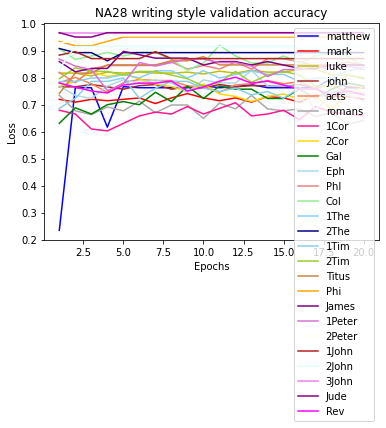

In [ ]:
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('NA28 writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [ ]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [ ]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
34/34 [==============================] - 3s 103ms/step - loss: 2.0153 - accuracy: 0.7826 - val_loss: 1.9934 - val_accuracy: 0.7903
Epoch 2/20
34/34 [==============================] - 3s 99ms/step - loss: 1.5060 - accuracy: 0.8397 - val_loss: 2.0687 - val_accuracy: 0.7903
Epoch 3/20
34/34 [==============================] - 2s 51ms/step - loss: 1.2936 - accuracy: 0.8632 - val_loss: 2.4218 - val_accuracy: 0.7828
Epoch 4/20
34/34 [==============================] - 2s 52ms/step - loss: 1.0389 - accuracy: 0.8857 - val_loss: 2.1235 - val_accuracy: 0.7715
Epoch 5/20
34/34 [==============================] - 2s 52ms/step - loss: 0.9302 - accuracy: 0.8960 - val_loss: 2.1131 - val_accuracy: 0.7865
Epoch 6/20
34/34 [==============================] - 2s 53ms/step - loss: 0.7885 - accuracy: 0.9194 - val_loss: 1.9548 - val_accuracy: 0.7640
Epoch 7/20
34/34 [==============================] - 2s 55ms/step - loss: 0.8034 - accuracy: 0.9203 - val_loss: 1.9684 - val_accuracy: 0.7678
Epoch 8/20
3

In [ ]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
24/24 [==============================] - 3s 112ms/step - loss: 1.3098 - accuracy: 0.8404 - val_loss: 1.4584 - val_accuracy: 0.8316
Epoch 2/20
24/24 [==============================] - 1s 51ms/step - loss: 0.8811 - accuracy: 0.9103 - val_loss: 1.6255 - val_accuracy: 0.8368
Epoch 3/20
24/24 [==============================] - 1s 50ms/step - loss: 0.7452 - accuracy: 0.9354 - val_loss: 1.5992 - val_accuracy: 0.8211
Epoch 4/20
24/24 [==============================] - 1s 52ms/step - loss: 0.7265 - accuracy: 0.9367 - val_loss: 1.7558 - val_accuracy: 0.8316
Epoch 5/20
24/24 [==============================] - 1s 53ms/step - loss: 0.7178 - accuracy: 0.9367 - val_loss: 1.6730 - val_accuracy: 0.8368
Epoch 6/20
24/24 [==============================] - 1s 53ms/step - loss: 0.5918 - accuracy: 0.9512 - val_loss: 1.4662 - val_accuracy: 0.8316
Epoch 7/20
24/24 [==============================] - 1s 55ms/step - loss: 0.5791 - accuracy: 0.9591 - val_loss: 1.4505 - val_accuracy: 0.8263
Epoch 8/20
2

In [ ]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
61/61 [==============================] - 5s 76ms/step - loss: 0.8006 - accuracy: 0.9122 - val_loss: 0.7168 - val_accuracy: 0.9212
Epoch 2/20
61/61 [==============================] - 3s 52ms/step - loss: 0.6240 - accuracy: 0.9345 - val_loss: 0.7085 - val_accuracy: 0.9149
Epoch 3/20
61/61 [==============================] - 3s 53ms/step - loss: 0.4527 - accuracy: 0.9496 - val_loss: 0.6674 - val_accuracy: 0.9108
Epoch 4/20
61/61 [==============================] - 3s 52ms/step - loss: 0.4368 - accuracy: 0.9564 - val_loss: 0.7590 - val_accuracy: 0.9046
Epoch 5/20
61/61 [==============================] - 3s 53ms/step - loss: 0.3756 - accuracy: 0.9652 - val_loss: 1.0294 - val_accuracy: 0.8963
Epoch 6/20
61/61 [==============================] - 3s 54ms/step - loss: 0.3686 - accuracy: 0.9584 - val_loss: 0.6883 - val_accuracy: 0.8963
Epoch 7/20
61/61 [==============================] - 3s 53ms/step - loss: 0.3244 - accuracy: 0.9662 - val_loss: 0.7539 - val_accuracy: 0.8859
Epoch 8/20
61

In [ ]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
10/10 [==============================] - 2s 194ms/step - loss: 2.8893 - accuracy: 0.7500 - val_loss: 2.6152 - val_accuracy: 0.7595
Epoch 2/20
10/10 [==============================] - 0s 50ms/step - loss: 1.8834 - accuracy: 0.8333 - val_loss: 2.4073 - val_accuracy: 0.7848
Epoch 3/20
10/10 [==============================] - 0s 48ms/step - loss: 1.7044 - accuracy: 0.8718 - val_loss: 2.2123 - val_accuracy: 0.7975
Epoch 4/20
10/10 [==============================] - 0s 50ms/step - loss: 1.6348 - accuracy: 0.8910 - val_loss: 2.1941 - val_accuracy: 0.8228
Epoch 5/20
10/10 [==============================] - 1s 50ms/step - loss: 1.6206 - accuracy: 0.8942 - val_loss: 2.1992 - val_accuracy: 0.8354
Epoch 6/20
10/10 [==============================] - 1s 51ms/step - loss: 1.6186 - accuracy: 0.8942 - val_loss: 2.3538 - val_accuracy: 0.8228
Epoch 7/20
10/10 [==============================] - 1s 52ms/step - loss: 1.6178 - accuracy: 0.8942 - val_loss: 2.3532 - val_accuracy: 0.8228
Epoch 8/20
1

In [ ]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 169ms/step - loss: 2.4004 - accuracy: 0.7627 - val_loss: 2.3624 - val_accuracy: 0.7528
Epoch 2/20
12/12 [==============================] - 1s 49ms/step - loss: 2.0283 - accuracy: 0.8503 - val_loss: 2.2333 - val_accuracy: 0.7640
Epoch 3/20
12/12 [==============================] - 1s 51ms/step - loss: 1.8706 - accuracy: 0.8559 - val_loss: 2.7570 - val_accuracy: 0.7416
Epoch 4/20
12/12 [==============================] - 1s 49ms/step - loss: 1.5347 - accuracy: 0.8757 - val_loss: 2.6206 - val_accuracy: 0.7416
Epoch 5/20
12/12 [==============================] - 1s 47ms/step - loss: 1.4631 - accuracy: 0.8983 - val_loss: 2.5617 - val_accuracy: 0.7528
Epoch 6/20
12/12 [==============================] - 1s 50ms/step - loss: 1.3250 - accuracy: 0.9040 - val_loss: 2.1173 - val_accuracy: 0.7753
Epoch 7/20
12/12 [==============================] - 1s 48ms/step - loss: 1.3030 - accuracy: 0.9124 - val_loss: 2.2223 - val_accuracy: 0.7865
Epoch 8/20
1

In [ ]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
43/43 [==============================] - 4s 88ms/step - loss: 1.3319 - accuracy: 0.8575 - val_loss: 1.0361 - val_accuracy: 0.8643
Epoch 2/20
43/43 [==============================] - 2s 52ms/step - loss: 0.9003 - accuracy: 0.9010 - val_loss: 1.1117 - val_accuracy: 0.8732
Epoch 3/20
43/43 [==============================] - 2s 52ms/step - loss: 0.6893 - accuracy: 0.9225 - val_loss: 1.0767 - val_accuracy: 0.8879
Epoch 4/20
43/43 [==============================] - 2s 52ms/step - loss: 0.5559 - accuracy: 0.9380 - val_loss: 0.9744 - val_accuracy: 0.8791
Epoch 5/20
43/43 [==============================] - 2s 55ms/step - loss: 0.4592 - accuracy: 0.9557 - val_loss: 1.0619 - val_accuracy: 0.8820
Epoch 6/20
43/43 [==============================] - 2s 54ms/step - loss: 0.4455 - accuracy: 0.9645 - val_loss: 0.8732 - val_accuracy: 0.8761
Epoch 7/20
43/43 [==============================] - 2s 53ms/step - loss: 0.4466 - accuracy: 0.9623 - val_loss: 1.0778 - val_accuracy: 0.8732
Epoch 8/20
43

In [ ]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
8/8 [==============================] - 2s 232ms/step - loss: 2.6099 - accuracy: 0.7480 - val_loss: 2.1228 - val_accuracy: 0.7742
Epoch 2/20
8/8 [==============================] - 0s 49ms/step - loss: 1.3289 - accuracy: 0.8780 - val_loss: 1.8098 - val_accuracy: 0.8387
Epoch 3/20
8/8 [==============================] - 0s 49ms/step - loss: 1.2007 - accuracy: 0.9146 - val_loss: 1.8282 - val_accuracy: 0.8065
Epoch 4/20
8/8 [==============================] - 0s 49ms/step - loss: 0.9668 - accuracy: 0.9228 - val_loss: 2.0415 - val_accuracy: 0.8065
Epoch 5/20
8/8 [==============================] - 0s 46ms/step - loss: 0.8315 - accuracy: 0.9390 - val_loss: 2.0407 - val_accuracy: 0.8226
Epoch 6/20
8/8 [==============================] - 0s 48ms/step - loss: 0.8088 - accuracy: 0.9472 - val_loss: 2.0402 - val_accuracy: 0.8226
Epoch 7/20
8/8 [==============================] - 0s 48ms/step - loss: 0.8087 - accuracy: 0.9472 - val_loss: 2.0369 - val_accuracy: 0.8226
Epoch 8/20
8/8 [==========

In [ ]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
58/58 [==============================] - 5s 79ms/step - loss: 1.4603 - accuracy: 0.8512 - val_loss: 0.9827 - val_accuracy: 0.8996
Epoch 2/20
58/58 [==============================] - 3s 54ms/step - loss: 0.7891 - accuracy: 0.9152 - val_loss: 0.8420 - val_accuracy: 0.9061
Epoch 3/20
58/58 [==============================] - 3s 54ms/step - loss: 0.6481 - accuracy: 0.9327 - val_loss: 0.6371 - val_accuracy: 0.8996
Epoch 4/20
58/58 [==============================] - 3s 54ms/step - loss: 0.5073 - accuracy: 0.9519 - val_loss: 0.9624 - val_accuracy: 0.9017
Epoch 5/20
58/58 [==============================] - 3s 53ms/step - loss: 0.4545 - accuracy: 0.9573 - val_loss: 0.9912 - val_accuracy: 0.8843
Epoch 6/20
58/58 [==============================] - 3s 55ms/step - loss: 0.4377 - accuracy: 0.9557 - val_loss: 0.9886 - val_accuracy: 0.8952
Epoch 7/20
58/58 [==============================] - 3s 56ms/step - loss: 0.3710 - accuracy: 0.9683 - val_loss: 1.0376 - val_accuracy: 0.8865
Epoch 8/20
58

In [ ]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
na28_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
na28_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
na28_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
na28_val_accuracy = DataFrame(au_val_accuracy)

In [ ]:
na28_loss.to_excel('author NA28 LOSS.xlsx',encoding = 'utf-8', index = False)
na28_accuracy.to_excel('author NA28 ACCURACY.xlsx',encoding = 'utf-8', index = False)  
na28_val_loss.to_excel('author NA28 VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
na28_val_accuracy.to_excel('author NA28 VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)   

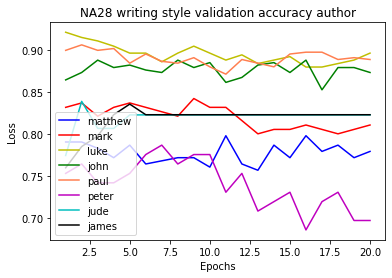

In [ ]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('NA28 writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## SBL_version

In [17]:
Matthew = df2[df2.BookName == 'Mt']
Matthew['Author'] = 'Matthew'
Mark = df2[df2.BookName == 'Mk']
Mark['Author'] = 'Mark'
Luke = df2[df2.BookName == 'Lk']
Luke['Author'] = 'Luke'
John = df2[df2.BookName == 'Jn']
John['Author'] = 'John'
Acts = df2[df2.BookName == 'Ac']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df2[df2.BookName == 'Jas']
James['Author'] = 'James'
f_Peter = df2[df2.BookName == '1Pe']
s_Peter = df2[df2.BookName == '2Pe']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df2[df2.BookName == '1Jn']
s_John = df2[df2.BookName == '2Jn']
t_John = df2[df2.BookName == '3Jn']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df2[df2.BookName == 'Jud']
Jude['Author'] = 'Jude'
Rev = df2[df2.BookName == 'Re']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [18]:
Romans = df2[df2.BookName == 'Ro']
Romans['Author'] = 'Paul'
f_cor = df2[df2.BookName == '1Co']
f_cor['Author'] = 'Paul'
s_cor = df2[df2.BookName == '2Co']
s_cor['Author'] = 'Paul'
Gal = df2[df2.BookName == 'Ga']
Gal['Author'] = 'Paul'
Eph = df2[df2.BookName == 'Eph']
Eph['Author'] = 'Paul'
Phi = df2[df2.BookName == 'Php']
Phi['Author'] = 'Paul'
Col = df2[df2.BookName == 'Col']
Col['Author'] = 'Paul'
f_the = df2[df2.BookName == '1Th']
f_the['Author'] = 'Paul'
s_the = df2[df2.BookName == '2Th']
s_the['Author'] = 'Paul'
f_tim = df2[df2.BookName == '1Ti']
f_tim['Author'] = 'Paul'
s_tim = df2[df2.BookName == '2Ti']
s_tim['Author'] = 'Paul'
Titus = df2[df2.BookName == 'Tit']
Titus['Author'] = 'Paul'
Philemon = df2[df2.BookName == 'Phm']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df2[df2.BookName == 'Heb']
Heb['Author'] = 'Paul?'

In [19]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [20]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [22]:
mat = model_output(g1,g11)

Epoch 1/20
35/35 [==============================] - 3s 90ms/step - loss: 0.6308 - accuracy: 0.7792 - val_loss: 0.5105 - val_accuracy: 0.7818
Epoch 2/20
35/35 [==============================] - 2s 49ms/step - loss: 0.5288 - accuracy: 0.7783 - val_loss: 0.5083 - val_accuracy: 0.7782
Epoch 3/20
35/35 [==============================] - 2s 51ms/step - loss: 0.5017 - accuracy: 0.7774 - val_loss: 0.5368 - val_accuracy: 0.7782
Epoch 4/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5094 - accuracy: 0.7755 - val_loss: 0.5844 - val_accuracy: 0.7127
Epoch 5/20
35/35 [==============================] - 2s 49ms/step - loss: 0.5203 - accuracy: 0.7737 - val_loss: 0.5651 - val_accuracy: 0.7818
Epoch 6/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5172 - accuracy: 0.7746 - val_loss: 0.5037 - val_accuracy: 0.7745
Epoch 7/20
35/35 [==============================] - 2s 50ms/step - loss: 0.5050 - accuracy: 0.7774 - val_loss: 0.4985 - val_accuracy: 0.7782
Epoch 8/20
35

In [23]:
mak = model_output(g2,g21)

Epoch 1/20
25/25 [==============================] - 3s 106ms/step - loss: 0.6809 - accuracy: 0.6859 - val_loss: 0.5506 - val_accuracy: 0.7296
Epoch 2/20
25/25 [==============================] - 1s 47ms/step - loss: 0.6095 - accuracy: 0.6821 - val_loss: 0.8291 - val_accuracy: 0.7092
Epoch 3/20
25/25 [==============================] - 1s 48ms/step - loss: 0.6017 - accuracy: 0.6936 - val_loss: 0.5845 - val_accuracy: 0.7041
Epoch 4/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5803 - accuracy: 0.7179 - val_loss: 0.5951 - val_accuracy: 0.7143
Epoch 5/20
25/25 [==============================] - 1s 48ms/step - loss: 0.6108 - accuracy: 0.7013 - val_loss: 0.5304 - val_accuracy: 0.7041
Epoch 6/20
25/25 [==============================] - 1s 48ms/step - loss: 0.5750 - accuracy: 0.7077 - val_loss: 0.5388 - val_accuracy: 0.7092
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 0.5679 - accuracy: 0.7154 - val_loss: 0.5571 - val_accuracy: 0.7143
Epoch 8/20
2

In [24]:
luk = model_output(g3,g31)

Epoch 1/20
37/37 [==============================] - 3s 86ms/step - loss: 0.6054 - accuracy: 0.7812 - val_loss: 0.5969 - val_accuracy: 0.8110
Epoch 2/20
37/37 [==============================] - 2s 48ms/step - loss: 0.6254 - accuracy: 0.7993 - val_loss: 0.5397 - val_accuracy: 0.8007
Epoch 3/20
37/37 [==============================] - 2s 48ms/step - loss: 0.5056 - accuracy: 0.7941 - val_loss: 0.6433 - val_accuracy: 0.8041
Epoch 4/20
37/37 [==============================] - 2s 49ms/step - loss: 0.5083 - accuracy: 0.8028 - val_loss: 0.4481 - val_accuracy: 0.8179
Epoch 5/20
37/37 [==============================] - 2s 49ms/step - loss: 0.4885 - accuracy: 0.7984 - val_loss: 0.5270 - val_accuracy: 0.8076
Epoch 6/20
37/37 [==============================] - 2s 48ms/step - loss: 0.4625 - accuracy: 0.8019 - val_loss: 0.5747 - val_accuracy: 0.7835
Epoch 7/20
37/37 [==============================] - 2s 49ms/step - loss: 0.4809 - accuracy: 0.8140 - val_loss: 0.5385 - val_accuracy: 0.7904
Epoch 8/20
37

In [25]:
joh = model_output(g4,g41)

Epoch 1/20
30/30 [==============================] - 3s 95ms/step - loss: 1.0402 - accuracy: 0.7134 - val_loss: 0.8296 - val_accuracy: 0.7137
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5989 - accuracy: 0.7551 - val_loss: 0.8183 - val_accuracy: 0.7222
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.5519 - accuracy: 0.7604 - val_loss: 0.6853 - val_accuracy: 0.7308
Epoch 4/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5103 - accuracy: 0.7636 - val_loss: 0.8015 - val_accuracy: 0.7137
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5505 - accuracy: 0.7818 - val_loss: 0.7010 - val_accuracy: 0.7308
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.5632 - accuracy: 0.7947 - val_loss: 0.8592 - val_accuracy: 0.7265
Epoch 7/20
30/30 [==============================] - 1s 48ms/step - loss: 0.5203 - accuracy: 0.7957 - val_loss: 0.8003 - val_accuracy: 0.7607
Epoch 8/20
30

In [26]:
act = model_output(acts,acts1)

Epoch 1/20
33/33 [==============================] - 3s 93ms/step - loss: 1.7460 - accuracy: 0.7404 - val_loss: 1.1936 - val_accuracy: 0.7088
Epoch 2/20
33/33 [==============================] - 2s 49ms/step - loss: 0.9464 - accuracy: 0.7423 - val_loss: 1.0455 - val_accuracy: 0.6820
Epoch 3/20
33/33 [==============================] - 2s 49ms/step - loss: 0.8855 - accuracy: 0.7586 - val_loss: 0.9315 - val_accuracy: 0.6935
Epoch 4/20
33/33 [==============================] - 2s 49ms/step - loss: 0.7437 - accuracy: 0.7519 - val_loss: 0.8383 - val_accuracy: 0.6743
Epoch 5/20
33/33 [==============================] - 2s 49ms/step - loss: 0.6169 - accuracy: 0.7826 - val_loss: 1.0830 - val_accuracy: 0.7318
Epoch 6/20
33/33 [==============================] - 2s 50ms/step - loss: 0.6760 - accuracy: 0.7864 - val_loss: 1.1496 - val_accuracy: 0.6973
Epoch 7/20
33/33 [==============================] - 2s 49ms/step - loss: 0.5288 - accuracy: 0.8017 - val_loss: 1.0641 - val_accuracy: 0.7625
Epoch 8/20
33

In [27]:
rom = model_output(rms,rms1)

Epoch 1/20
19/19 [==============================] - 2s 123ms/step - loss: 2.6982 - accuracy: 0.5768 - val_loss: 2.3226 - val_accuracy: 0.6327
Epoch 2/20
19/19 [==============================] - 1s 47ms/step - loss: 1.9360 - accuracy: 0.6109 - val_loss: 2.0092 - val_accuracy: 0.6054
Epoch 3/20
19/19 [==============================] - 1s 48ms/step - loss: 1.4089 - accuracy: 0.6160 - val_loss: 1.9252 - val_accuracy: 0.5986
Epoch 4/20
19/19 [==============================] - 1s 47ms/step - loss: 1.1612 - accuracy: 0.6638 - val_loss: 1.7331 - val_accuracy: 0.6122
Epoch 5/20
19/19 [==============================] - 1s 47ms/step - loss: 1.1355 - accuracy: 0.6877 - val_loss: 1.7099 - val_accuracy: 0.6259
Epoch 6/20
19/19 [==============================] - 1s 48ms/step - loss: 0.9014 - accuracy: 0.7338 - val_loss: 2.1047 - val_accuracy: 0.5782
Epoch 7/20
19/19 [==============================] - 1s 47ms/step - loss: 0.8522 - accuracy: 0.7389 - val_loss: 1.8578 - val_accuracy: 0.6122
Epoch 8/20
1

In [28]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
19/19 [==============================] - 2s 124ms/step - loss: 2.0638 - accuracy: 0.6419 - val_loss: 1.1826 - val_accuracy: 0.6554
Epoch 2/20
19/19 [==============================] - 1s 46ms/step - loss: 1.4789 - accuracy: 0.7280 - val_loss: 1.0645 - val_accuracy: 0.6689
Epoch 3/20
19/19 [==============================] - 1s 47ms/step - loss: 1.2726 - accuracy: 0.7703 - val_loss: 1.0583 - val_accuracy: 0.6486
Epoch 4/20
19/19 [==============================] - 1s 48ms/step - loss: 1.2093 - accuracy: 0.7551 - val_loss: 1.1626 - val_accuracy: 0.6757
Epoch 5/20
19/19 [==============================] - 1s 48ms/step - loss: 0.9761 - accuracy: 0.7973 - val_loss: 1.4063 - val_accuracy: 0.6554
Epoch 6/20
19/19 [==============================] - 1s 48ms/step - loss: 0.8780 - accuracy: 0.8142 - val_loss: 1.5020 - val_accuracy: 0.6824
Epoch 7/20
19/19 [==============================] - 1s 49ms/step - loss: 0.7464 - accuracy: 0.8530 - val_loss: 1.5669 - val_accuracy: 0.6757
Epoch 8/20
1

In [29]:
scr = model_output(scor,scor1)

Epoch 1/20
14/14 [==============================] - 2s 149ms/step - loss: 2.8975 - accuracy: 0.7114 - val_loss: 3.8924 - val_accuracy: 0.6250
Epoch 2/20
14/14 [==============================] - 1s 47ms/step - loss: 2.6381 - accuracy: 0.7360 - val_loss: 2.7642 - val_accuracy: 0.6875
Epoch 3/20
14/14 [==============================] - 1s 47ms/step - loss: 1.9012 - accuracy: 0.7852 - val_loss: 2.7553 - val_accuracy: 0.7054
Epoch 4/20
14/14 [==============================] - 1s 48ms/step - loss: 1.7862 - accuracy: 0.8210 - val_loss: 2.8434 - val_accuracy: 0.6518
Epoch 5/20
14/14 [==============================] - 1s 48ms/step - loss: 1.6179 - accuracy: 0.8121 - val_loss: 2.8121 - val_accuracy: 0.6786
Epoch 6/20
14/14 [==============================] - 1s 47ms/step - loss: 1.5187 - accuracy: 0.8300 - val_loss: 2.2258 - val_accuracy: 0.6607
Epoch 7/20
14/14 [==============================] - 1s 49ms/step - loss: 1.3366 - accuracy: 0.8702 - val_loss: 2.3371 - val_accuracy: 0.7054
Epoch 8/20
1

In [30]:
glt = model_output(gal,gal1)

Epoch 1/20
12/12 [==============================] - 2s 162ms/step - loss: 2.3063 - accuracy: 0.7784 - val_loss: 2.5454 - val_accuracy: 0.8132
Epoch 2/20
12/12 [==============================] - 1s 46ms/step - loss: 1.8259 - accuracy: 0.8227 - val_loss: 2.2177 - val_accuracy: 0.7582
Epoch 3/20
12/12 [==============================] - 1s 50ms/step - loss: 1.5860 - accuracy: 0.8587 - val_loss: 2.5788 - val_accuracy: 0.7582
Epoch 4/20
12/12 [==============================] - 1s 44ms/step - loss: 1.4829 - accuracy: 0.8809 - val_loss: 2.2226 - val_accuracy: 0.7473
Epoch 5/20
12/12 [==============================] - 1s 46ms/step - loss: 1.2008 - accuracy: 0.8920 - val_loss: 2.7905 - val_accuracy: 0.7143
Epoch 6/20
12/12 [==============================] - 1s 46ms/step - loss: 1.0792 - accuracy: 0.9086 - val_loss: 2.4774 - val_accuracy: 0.7143
Epoch 7/20
12/12 [==============================] - 1s 46ms/step - loss: 0.9993 - accuracy: 0.9114 - val_loss: 3.0218 - val_accuracy: 0.7143
Epoch 8/20
1

In [31]:
ept = model_output(eph,eph1)

Epoch 1/20
12/12 [==============================] - 2s 175ms/step - loss: 1.6681 - accuracy: 0.8251 - val_loss: 2.3332 - val_accuracy: 0.7391
Epoch 2/20
12/12 [==============================] - 1s 50ms/step - loss: 1.1760 - accuracy: 0.8525 - val_loss: 2.0153 - val_accuracy: 0.8152
Epoch 3/20
12/12 [==============================] - 1s 47ms/step - loss: 1.1454 - accuracy: 0.9044 - val_loss: 2.0121 - val_accuracy: 0.8152
Epoch 4/20
12/12 [==============================] - 1s 48ms/step - loss: 1.0928 - accuracy: 0.9071 - val_loss: 2.3758 - val_accuracy: 0.7717
Epoch 5/20
12/12 [==============================] - 1s 48ms/step - loss: 1.0338 - accuracy: 0.9098 - val_loss: 2.0411 - val_accuracy: 0.7935
Epoch 6/20
12/12 [==============================] - 1s 47ms/step - loss: 0.9632 - accuracy: 0.9290 - val_loss: 2.0312 - val_accuracy: 0.7935
Epoch 7/20
12/12 [==============================] - 1s 48ms/step - loss: 0.9852 - accuracy: 0.9372 - val_loss: 2.1768 - val_accuracy: 0.7935
Epoch 8/20
1

In [32]:
plp = model_output(phi,phi1)

Epoch 1/20
11/11 [==============================] - 2s 179ms/step - loss: 1.4510 - accuracy: 0.8338 - val_loss: 1.9842 - val_accuracy: 0.7927
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 1.2713 - accuracy: 0.8554 - val_loss: 1.4442 - val_accuracy: 0.8659
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 0.8312 - accuracy: 0.9231 - val_loss: 1.6959 - val_accuracy: 0.8415
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 0.6962 - accuracy: 0.9446 - val_loss: 1.5988 - val_accuracy: 0.8415
Epoch 5/20
11/11 [==============================] - 1s 47ms/step - loss: 0.6769 - accuracy: 0.9538 - val_loss: 1.7804 - val_accuracy: 0.8293
Epoch 6/20
11/11 [==============================] - 1s 47ms/step - loss: 0.6735 - accuracy: 0.9569 - val_loss: 1.8748 - val_accuracy: 0.7683
Epoch 7/20
11/11 [==============================] - 1s 46ms/step - loss: 0.7635 - accuracy: 0.9262 - val_loss: 1.4285 - val_accuracy: 0.8537
Epoch 8/20
1

In [33]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 192ms/step - loss: 1.6517 - accuracy: 0.8648 - val_loss: 1.8054 - val_accuracy: 0.8375
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 1.5283 - accuracy: 0.8836 - val_loss: 1.7020 - val_accuracy: 0.8125
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1600 - accuracy: 0.9057 - val_loss: 2.0805 - val_accuracy: 0.7875
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1287 - accuracy: 0.9214 - val_loss: 2.0280 - val_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1276 - accuracy: 0.9214 - val_loss: 1.7187 - val_accuracy: 0.8125
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 1.1175 - accuracy: 0.9277 - val_loss: 1.7026 - val_accuracy: 0.8000
Epoch 7/20
10/10 [==============================] - 0s 46ms/step - loss: 1.1145 - accuracy: 0.9277 - val_loss: 1.7455 - val_accuracy: 0.8125
Epoch 8/20
1

In [34]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 2s 193ms/step - loss: 0.9395 - accuracy: 0.8914 - val_loss: 1.8523 - val_accuracy: 0.8228
Epoch 2/20
10/10 [==============================] - 0s 46ms/step - loss: 0.6873 - accuracy: 0.9425 - val_loss: 1.6579 - val_accuracy: 0.8481
Epoch 3/20
10/10 [==============================] - 0s 49ms/step - loss: 0.7064 - accuracy: 0.9457 - val_loss: 1.4387 - val_accuracy: 0.8734
Epoch 4/20
10/10 [==============================] - 0s 47ms/step - loss: 0.6547 - accuracy: 0.9553 - val_loss: 1.4649 - val_accuracy: 0.8608
Epoch 5/20
10/10 [==============================] - 0s 48ms/step - loss: 0.5997 - accuracy: 0.9553 - val_loss: 1.6762 - val_accuracy: 0.8734
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 0.5944 - accuracy: 0.9617 - val_loss: 1.8153 - val_accuracy: 0.8608
Epoch 7/20
10/10 [==============================] - 0s 48ms/step - loss: 0.5959 - accuracy: 0.9617 - val_loss: 1.8275 - val_accuracy: 0.8354
Epoch 8/20
1

In [35]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 2s 211ms/step - loss: 1.2964 - accuracy: 0.8821 - val_loss: 1.6109 - val_accuracy: 0.8714
Epoch 2/20
9/9 [==============================] - 0s 48ms/step - loss: 1.0533 - accuracy: 0.9321 - val_loss: 1.9937 - val_accuracy: 0.8714
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 1.0460 - accuracy: 0.9321 - val_loss: 1.9934 - val_accuracy: 0.8714
Epoch 4/20
9/9 [==============================] - 0s 45ms/step - loss: 1.0449 - accuracy: 0.9321 - val_loss: 1.9930 - val_accuracy: 0.8714
Epoch 5/20
9/9 [==============================] - 0s 46ms/step - loss: 1.0444 - accuracy: 0.9321 - val_loss: 1.9952 - val_accuracy: 0.8714
Epoch 6/20
9/9 [==============================] - 0s 46ms/step - loss: 1.0445 - accuracy: 0.9321 - val_loss: 1.6490 - val_accuracy: 0.8714
Epoch 7/20
9/9 [==============================] - 0s 48ms/step - loss: 1.0442 - accuracy: 0.9321 - val_loss: 1.6490 - val_accuracy: 0.8714
Epoch 8/20
9/9 [==========

In [36]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
11/11 [==============================] - 3s 259ms/step - loss: 2.2138 - accuracy: 0.7922 - val_loss: 1.8216 - val_accuracy: 0.7857
Epoch 2/20
11/11 [==============================] - 1s 48ms/step - loss: 1.8518 - accuracy: 0.8283 - val_loss: 1.9567 - val_accuracy: 0.7857
Epoch 3/20
11/11 [==============================] - 1s 46ms/step - loss: 1.7473 - accuracy: 0.8554 - val_loss: 1.9594 - val_accuracy: 0.7857
Epoch 4/20
11/11 [==============================] - 1s 48ms/step - loss: 1.7153 - accuracy: 0.8645 - val_loss: 1.8364 - val_accuracy: 0.7857
Epoch 5/20
11/11 [==============================] - 1s 49ms/step - loss: 1.6735 - accuracy: 0.8795 - val_loss: 1.9199 - val_accuracy: 0.8095
Epoch 6/20
11/11 [==============================] - 1s 47ms/step - loss: 1.5249 - accuracy: 0.8886 - val_loss: 1.2682 - val_accuracy: 0.8095
Epoch 7/20
11/11 [==============================] - 1s 48ms/step - loss: 1.5422 - accuracy: 0.8825 - val_loss: 1.8638 - val_accuracy: 0.8214
Epoch 8/20
1

In [37]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 190ms/step - loss: 2.1591 - accuracy: 0.7857 - val_loss: 1.4888 - val_accuracy: 0.8333
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 1.6210 - accuracy: 0.8669 - val_loss: 1.4135 - val_accuracy: 0.8205
Epoch 3/20
10/10 [==============================] - 0s 49ms/step - loss: 1.3927 - accuracy: 0.8961 - val_loss: 1.3506 - val_accuracy: 0.8205
Epoch 4/20
10/10 [==============================] - 0s 46ms/step - loss: 1.3472 - accuracy: 0.8961 - val_loss: 1.4970 - val_accuracy: 0.8462
Epoch 5/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1892 - accuracy: 0.9156 - val_loss: 1.2579 - val_accuracy: 0.8974
Epoch 6/20
10/10 [==============================] - 0s 46ms/step - loss: 1.1212 - accuracy: 0.9253 - val_loss: 1.1015 - val_accuracy: 0.8846
Epoch 7/20
10/10 [==============================] - 0s 47ms/step - loss: 1.1045 - accuracy: 0.9286 - val_loss: 1.2855 - val_accuracy: 0.8718
Epoch 8/20
1

In [38]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 215ms/step - loss: 1.2644 - accuracy: 0.8746 - val_loss: 0.7947 - val_accuracy: 0.8857
Epoch 2/20
9/9 [==============================] - 0s 48ms/step - loss: 1.0796 - accuracy: 0.9176 - val_loss: 1.1504 - val_accuracy: 0.9143
Epoch 3/20
9/9 [==============================] - 0s 47ms/step - loss: 1.0539 - accuracy: 0.9319 - val_loss: 0.8100 - val_accuracy: 0.9143
Epoch 4/20
9/9 [==============================] - 0s 49ms/step - loss: 1.1147 - accuracy: 0.9247 - val_loss: 1.1728 - val_accuracy: 0.9000
Epoch 5/20
9/9 [==============================] - 0s 46ms/step - loss: 1.0014 - accuracy: 0.9319 - val_loss: 1.1556 - val_accuracy: 0.9000
Epoch 6/20
9/9 [==============================] - 0s 46ms/step - loss: 0.9950 - accuracy: 0.9355 - val_loss: 1.0081 - val_accuracy: 0.9000
Epoch 7/20
9/9 [==============================] - 0s 47ms/step - loss: 1.0502 - accuracy: 0.9319 - val_loss: 1.1714 - val_accuracy: 0.9000
Epoch 8/20
9/9 [==========

In [39]:
plm = model_output(philemon,philemon1)

Epoch 1/20
9/9 [==============================] - 2s 213ms/step - loss: 0.9042 - accuracy: 0.9008 - val_loss: 0.3085 - val_accuracy: 0.9242
Epoch 2/20
9/9 [==============================] - 0s 45ms/step - loss: 0.9453 - accuracy: 0.9351 - val_loss: 0.7303 - val_accuracy: 0.9242
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 0.8982 - accuracy: 0.9351 - val_loss: 0.7634 - val_accuracy: 0.9394
Epoch 4/20
9/9 [==============================] - 0s 45ms/step - loss: 0.8838 - accuracy: 0.9427 - val_loss: 0.7163 - val_accuracy: 0.9394
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 0.8840 - accuracy: 0.9427 - val_loss: 0.7194 - val_accuracy: 0.9394
Epoch 6/20
9/9 [==============================] - 0s 45ms/step - loss: 0.8824 - accuracy: 0.9427 - val_loss: 0.7194 - val_accuracy: 0.9394
Epoch 7/20
9/9 [==============================] - 0s 44ms/step - loss: 0.8824 - accuracy: 0.9427 - val_loss: 0.7194 - val_accuracy: 0.9394
Epoch 8/20
9/9 [==========

In [40]:
jam = model_output(jams,jams1)

Epoch 1/20
11/11 [==============================] - 2s 178ms/step - loss: 2.3734 - accuracy: 0.8140 - val_loss: 2.1736 - val_accuracy: 0.7952
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 1.8936 - accuracy: 0.8262 - val_loss: 2.1315 - val_accuracy: 0.8072
Epoch 3/20
11/11 [==============================] - 1s 46ms/step - loss: 1.7361 - accuracy: 0.8689 - val_loss: 2.1048 - val_accuracy: 0.8434
Epoch 4/20
11/11 [==============================] - 1s 47ms/step - loss: 1.5976 - accuracy: 0.8841 - val_loss: 2.1446 - val_accuracy: 0.7952
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5777 - accuracy: 0.8872 - val_loss: 2.1154 - val_accuracy: 0.8193
Epoch 6/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5100 - accuracy: 0.9024 - val_loss: 2.1093 - val_accuracy: 0.8193
Epoch 7/20
11/11 [==============================] - 1s 46ms/step - loss: 1.5039 - accuracy: 0.9024 - val_loss: 2.1146 - val_accuracy: 0.8193
Epoch 8/20
1

In [41]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
11/11 [==============================] - 2s 181ms/step - loss: 2.2000 - accuracy: 0.8037 - val_loss: 2.1838 - val_accuracy: 0.8171
Epoch 2/20
11/11 [==============================] - 1s 47ms/step - loss: 1.9452 - accuracy: 0.8589 - val_loss: 2.3137 - val_accuracy: 0.8293
Epoch 3/20
11/11 [==============================] - 1s 47ms/step - loss: 1.7103 - accuracy: 0.8773 - val_loss: 1.8640 - val_accuracy: 0.8415
Epoch 4/20
11/11 [==============================] - 1s 46ms/step - loss: 1.3707 - accuracy: 0.8773 - val_loss: 1.6523 - val_accuracy: 0.8415
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 1.2609 - accuracy: 0.9141 - val_loss: 1.8196 - val_accuracy: 0.8293
Epoch 6/20
11/11 [==============================] - 1s 47ms/step - loss: 1.1223 - accuracy: 0.9172 - val_loss: 1.8428 - val_accuracy: 0.8171
Epoch 7/20
11/11 [==============================] - 1s 47ms/step - loss: 1.1006 - accuracy: 0.9264 - val_loss: 1.8185 - val_accuracy: 0.8293
Epoch 8/20
1

In [42]:
spt = model_output(spet,spet1)

Epoch 1/20
10/10 [==============================] - 2s 195ms/step - loss: 1.3653 - accuracy: 0.8935 - val_loss: 1.1532 - val_accuracy: 0.8904
Epoch 2/20
10/10 [==============================] - 0s 47ms/step - loss: 0.9618 - accuracy: 0.9175 - val_loss: 1.4855 - val_accuracy: 0.9041
Epoch 3/20
10/10 [==============================] - 0s 49ms/step - loss: 0.8551 - accuracy: 0.9416 - val_loss: 1.3107 - val_accuracy: 0.9041
Epoch 4/20
10/10 [==============================] - 0s 48ms/step - loss: 0.8474 - accuracy: 0.9450 - val_loss: 1.3071 - val_accuracy: 0.9041
Epoch 5/20
10/10 [==============================] - 0s 48ms/step - loss: 0.8469 - accuracy: 0.9450 - val_loss: 1.3071 - val_accuracy: 0.9041
Epoch 6/20
10/10 [==============================] - 0s 48ms/step - loss: 0.8469 - accuracy: 0.9450 - val_loss: 1.3071 - val_accuracy: 0.9041
Epoch 7/20
10/10 [==============================] - 0s 48ms/step - loss: 0.8469 - accuracy: 0.9450 - val_loss: 1.3071 - val_accuracy: 0.9041
Epoch 8/20
1

In [43]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
11/11 [==============================] - 2s 180ms/step - loss: 1.0092 - accuracy: 0.8896 - val_loss: 0.9768 - val_accuracy: 0.9268
Epoch 2/20
11/11 [==============================] - 1s 46ms/step - loss: 0.7441 - accuracy: 0.9387 - val_loss: 0.9992 - val_accuracy: 0.9146
Epoch 3/20
11/11 [==============================] - 1s 48ms/step - loss: 0.6844 - accuracy: 0.9509 - val_loss: 1.3285 - val_accuracy: 0.8293
Epoch 4/20
11/11 [==============================] - 1s 49ms/step - loss: 0.6873 - accuracy: 0.9448 - val_loss: 1.2072 - val_accuracy: 0.8780
Epoch 5/20
11/11 [==============================] - 1s 46ms/step - loss: 0.7266 - accuracy: 0.9417 - val_loss: 1.1893 - val_accuracy: 0.9146
Epoch 6/20
11/11 [==============================] - 1s 46ms/step - loss: 0.6171 - accuracy: 0.9601 - val_loss: 1.2226 - val_accuracy: 0.9024
Epoch 7/20
11/11 [==============================] - 1s 47ms/step - loss: 0.6148 - accuracy: 0.9601 - val_loss: 1.1777 - val_accuracy: 0.9024
Epoch 8/20
1

In [44]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 228ms/step - loss: 0.5908 - accuracy: 0.9405 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 2/20
8/8 [==============================] - 0s 45ms/step - loss: 0.5499 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 3/20
8/8 [==============================] - 0s 48ms/step - loss: 0.5495 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 4/20
8/8 [==============================] - 0s 46ms/step - loss: 0.5495 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 5/20
8/8 [==============================] - 0s 50ms/step - loss: 0.5495 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 6/20
8/8 [==============================] - 0s 44ms/step - loss: 0.5495 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 7/20
8/8 [==============================] - 0s 47ms/step - loss: 0.5495 - accuracy: 0.9643 - val_loss: 0.4820 - val_accuracy: 0.9688
Epoch 8/20
8/8 [==========

In [45]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 228ms/step - loss: 0.7040 - accuracy: 0.9409 - val_loss: 0.2383 - val_accuracy: 0.9844
Epoch 2/20
8/8 [==============================] - 0s 48ms/step - loss: 0.6772 - accuracy: 0.9528 - val_loss: 0.2397 - val_accuracy: 0.9844
Epoch 3/20
8/8 [==============================] - 0s 46ms/step - loss: 0.6318 - accuracy: 0.9567 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 4/20
8/8 [==============================] - 0s 47ms/step - loss: 0.6298 - accuracy: 0.9488 - val_loss: 0.0409 - val_accuracy: 0.9844
Epoch 5/20
8/8 [==============================] - 0s 45ms/step - loss: 0.6143 - accuracy: 0.9606 - val_loss: 0.0379 - val_accuracy: 0.9844
Epoch 6/20
8/8 [==============================] - 0s 45ms/step - loss: 0.6095 - accuracy: 0.9606 - val_loss: 0.0335 - val_accuracy: 0.9844
Epoch 7/20
8/8 [==============================] - 0s 47ms/step - loss: 0.6073 - accuracy: 0.9606 - val_loss: 0.0302 - val_accuracy: 0.9844
Epoch 8/20
8/8 [==========

In [46]:
jde = model_output(jud,jud1)

Epoch 1/20
9/9 [==============================] - 2s 210ms/step - loss: 1.0116 - accuracy: 0.9313 - val_loss: 0.7205 - val_accuracy: 0.9545
Epoch 2/20
9/9 [==============================] - 0s 47ms/step - loss: 0.9501 - accuracy: 0.9351 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 3/20
9/9 [==============================] - 0s 45ms/step - loss: 0.9413 - accuracy: 0.9389 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 4/20
9/9 [==============================] - 0s 46ms/step - loss: 0.9413 - accuracy: 0.9389 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 5/20
9/9 [==============================] - 0s 45ms/step - loss: 0.9413 - accuracy: 0.9389 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 6/20
9/9 [==============================] - 0s 44ms/step - loss: 0.9413 - accuracy: 0.9389 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 7/20
9/9 [==============================] - 0s 47ms/step - loss: 0.9413 - accuracy: 0.9389 - val_loss: 0.7368 - val_accuracy: 0.9394
Epoch 8/20
9/9 [==========

In [47]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 2s 131ms/step - loss: 3.4707 - accuracy: 0.6837 - val_loss: 2.6674 - val_accuracy: 0.7606
Epoch 2/20
18/18 [==============================] - 1s 49ms/step - loss: 2.3658 - accuracy: 0.7721 - val_loss: 2.4770 - val_accuracy: 0.7535
Epoch 3/20
18/18 [==============================] - 1s 48ms/step - loss: 2.0025 - accuracy: 0.8074 - val_loss: 2.6889 - val_accuracy: 0.7535
Epoch 4/20
18/18 [==============================] - 1s 48ms/step - loss: 1.7540 - accuracy: 0.8357 - val_loss: 2.8118 - val_accuracy: 0.7183
Epoch 5/20
18/18 [==============================] - 1s 49ms/step - loss: 1.4488 - accuracy: 0.8498 - val_loss: 2.4550 - val_accuracy: 0.7817
Epoch 6/20
18/18 [==============================] - 1s 49ms/step - loss: 1.2483 - accuracy: 0.8675 - val_loss: 2.2211 - val_accuracy: 0.7606
Epoch 7/20
18/18 [==============================] - 1s 49ms/step - loss: 1.1402 - accuracy: 0.9011 - val_loss: 2.2763 - val_accuracy: 0.7746
Epoch 8/20
1

In [48]:
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
sbl_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
sbl_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
sbl_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
sbl_val_accuracy = DataFrame(df_val_accuracy)

In [49]:
sbl_loss.to_excel('SBL LOSS.xlsx',encoding = 'utf-8', index = False)
sbl_accuracy.to_excel('SBL ACCURACY.xlsx',encoding = 'utf-8', index = False)  
sbl_val_loss.to_excel('SBL VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
sbl_val_accuracy.to_excel('SBL VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False) 

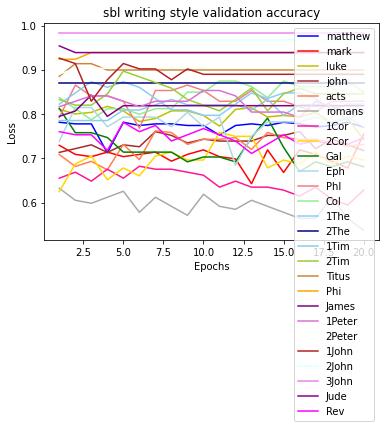

In [50]:
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('sbl writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [52]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [53]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
35/35 [==============================] - 3s 97ms/step - loss: 2.1855 - accuracy: 0.7664 - val_loss: 1.6919 - val_accuracy: 0.8400
Epoch 2/20
35/35 [==============================] - 2s 53ms/step - loss: 1.7970 - accuracy: 0.8212 - val_loss: 2.0322 - val_accuracy: 0.8073
Epoch 3/20
35/35 [==============================] - 2s 54ms/step - loss: 1.6219 - accuracy: 0.8339 - val_loss: 1.7373 - val_accuracy: 0.8109
Epoch 4/20
35/35 [==============================] - 2s 52ms/step - loss: 1.3264 - accuracy: 0.8476 - val_loss: 1.6660 - val_accuracy: 0.8218
Epoch 5/20
35/35 [==============================] - 2s 52ms/step - loss: 1.2122 - accuracy: 0.8668 - val_loss: 1.5911 - val_accuracy: 0.8073
Epoch 6/20
35/35 [==============================] - 2s 51ms/step - loss: 1.0995 - accuracy: 0.8622 - val_loss: 1.4509 - val_accuracy: 0.8255
Epoch 7/20
35/35 [==============================] - 2s 52ms/step - loss: 0.9589 - accuracy: 0.8841 - val_loss: 1.4701 - val_accuracy: 0.8109
Epoch 8/20
35

In [54]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
25/25 [==============================] - 3s 109ms/step - loss: 1.4020 - accuracy: 0.8474 - val_loss: 0.9666 - val_accuracy: 0.8827
Epoch 2/20
25/25 [==============================] - 1s 51ms/step - loss: 1.2635 - accuracy: 0.8769 - val_loss: 1.3920 - val_accuracy: 0.8469
Epoch 3/20
25/25 [==============================] - 1s 51ms/step - loss: 0.9215 - accuracy: 0.9154 - val_loss: 1.0340 - val_accuracy: 0.8520
Epoch 4/20
25/25 [==============================] - 1s 52ms/step - loss: 0.8564 - accuracy: 0.9359 - val_loss: 1.2433 - val_accuracy: 0.8622
Epoch 5/20
25/25 [==============================] - 1s 52ms/step - loss: 0.8471 - accuracy: 0.9359 - val_loss: 1.1878 - val_accuracy: 0.8724
Epoch 6/20
25/25 [==============================] - 1s 50ms/step - loss: 0.9037 - accuracy: 0.9282 - val_loss: 1.1011 - val_accuracy: 0.8673
Epoch 7/20
25/25 [==============================] - 1s 51ms/step - loss: 0.7563 - accuracy: 0.9385 - val_loss: 1.3580 - val_accuracy: 0.8418
Epoch 8/20
2

In [55]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
62/62 [==============================] - 5s 76ms/step - loss: 0.8705 - accuracy: 0.9052 - val_loss: 0.9884 - val_accuracy: 0.8961
Epoch 2/20
62/62 [==============================] - 3s 51ms/step - loss: 0.5832 - accuracy: 0.9338 - val_loss: 1.0138 - val_accuracy: 0.8839
Epoch 3/20
62/62 [==============================] - 3s 51ms/step - loss: 0.4960 - accuracy: 0.9465 - val_loss: 0.9164 - val_accuracy: 0.8921
Epoch 4/20
62/62 [==============================] - 3s 52ms/step - loss: 0.4533 - accuracy: 0.9536 - val_loss: 0.8970 - val_accuracy: 0.8941
Epoch 5/20
62/62 [==============================] - 3s 51ms/step - loss: 0.4012 - accuracy: 0.9608 - val_loss: 1.2622 - val_accuracy: 0.8676
Epoch 6/20
62/62 [==============================] - 3s 52ms/step - loss: 0.3716 - accuracy: 0.9669 - val_loss: 1.2586 - val_accuracy: 0.8554
Epoch 7/20
62/62 [==============================] - 3s 52ms/step - loss: 0.3381 - accuracy: 0.9725 - val_loss: 1.1670 - val_accuracy: 0.8635
Epoch 8/20
62

In [56]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
11/11 [==============================] - 2s 188ms/step - loss: 4.5950 - accuracy: 0.6098 - val_loss: 2.8755 - val_accuracy: 0.6867
Epoch 2/20
11/11 [==============================] - 1s 50ms/step - loss: 2.3239 - accuracy: 0.7774 - val_loss: 2.6432 - val_accuracy: 0.8072
Epoch 3/20
11/11 [==============================] - 1s 52ms/step - loss: 1.8761 - accuracy: 0.8445 - val_loss: 2.6430 - val_accuracy: 0.8193
Epoch 4/20
11/11 [==============================] - 1s 49ms/step - loss: 1.7146 - accuracy: 0.8841 - val_loss: 2.6485 - val_accuracy: 0.8193
Epoch 5/20
11/11 [==============================] - 1s 50ms/step - loss: 1.5796 - accuracy: 0.8933 - val_loss: 2.8507 - val_accuracy: 0.7711
Epoch 6/20
11/11 [==============================] - 1s 48ms/step - loss: 1.4227 - accuracy: 0.8872 - val_loss: 2.4942 - val_accuracy: 0.8072
Epoch 7/20
11/11 [==============================] - 1s 51ms/step - loss: 1.2758 - accuracy: 0.8933 - val_loss: 2.5000 - val_accuracy: 0.7952
Epoch 8/20
1

In [57]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 174ms/step - loss: 2.0107 - accuracy: 0.8187 - val_loss: 1.4721 - val_accuracy: 0.8404
Epoch 2/20
12/12 [==============================] - 1s 50ms/step - loss: 1.6911 - accuracy: 0.8773 - val_loss: 1.4632 - val_accuracy: 0.8298
Epoch 3/20
12/12 [==============================] - 1s 49ms/step - loss: 1.5119 - accuracy: 0.8907 - val_loss: 1.3215 - val_accuracy: 0.8511
Epoch 4/20
12/12 [==============================] - 1s 50ms/step - loss: 1.4840 - accuracy: 0.9013 - val_loss: 1.3253 - val_accuracy: 0.8404
Epoch 5/20
12/12 [==============================] - 1s 50ms/step - loss: 1.4796 - accuracy: 0.9040 - val_loss: 1.4345 - val_accuracy: 0.8617
Epoch 6/20
12/12 [==============================] - 1s 50ms/step - loss: 1.4787 - accuracy: 0.9040 - val_loss: 1.3253 - val_accuracy: 0.8404
Epoch 7/20
12/12 [==============================] - 1s 50ms/step - loss: 1.4783 - accuracy: 0.9040 - val_loss: 1.2855 - val_accuracy: 0.8298
Epoch 8/20
1

In [58]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
43/43 [==============================] - 5s 122ms/step - loss: 2.5758 - accuracy: 0.7597 - val_loss: 1.9584 - val_accuracy: 0.8187
Epoch 2/20
43/43 [==============================] - 2s 52ms/step - loss: 2.0992 - accuracy: 0.8300 - val_loss: 1.9351 - val_accuracy: 0.8333
Epoch 3/20
43/43 [==============================] - 2s 52ms/step - loss: 1.9482 - accuracy: 0.8498 - val_loss: 2.1069 - val_accuracy: 0.8246
Epoch 4/20
43/43 [==============================] - 2s 54ms/step - loss: 1.8711 - accuracy: 0.8586 - val_loss: 2.1669 - val_accuracy: 0.8216
Epoch 5/20
43/43 [==============================] - 2s 53ms/step - loss: 1.7578 - accuracy: 0.8681 - val_loss: 2.1796 - val_accuracy: 0.8246
Epoch 6/20
43/43 [==============================] - 2s 52ms/step - loss: 1.6444 - accuracy: 0.8703 - val_loss: 2.3080 - val_accuracy: 0.7924
Epoch 7/20
43/43 [==============================] - 2s 53ms/step - loss: 1.4988 - accuracy: 0.8813 - val_loss: 2.3161 - val_accuracy: 0.7836
Epoch 8/20
4

In [59]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
9/9 [==============================] - 2s 214ms/step - loss: 4.6813 - accuracy: 0.5687 - val_loss: 1.7456 - val_accuracy: 0.8333
Epoch 2/20
9/9 [==============================] - 0s 51ms/step - loss: 1.5656 - accuracy: 0.8664 - val_loss: 1.6926 - val_accuracy: 0.8333
Epoch 3/20
9/9 [==============================] - 0s 46ms/step - loss: 1.3977 - accuracy: 0.8893 - val_loss: 1.5566 - val_accuracy: 0.8182
Epoch 4/20
9/9 [==============================] - 0s 48ms/step - loss: 1.2048 - accuracy: 0.9122 - val_loss: 1.6315 - val_accuracy: 0.8485
Epoch 5/20
9/9 [==============================] - 0s 47ms/step - loss: 1.0285 - accuracy: 0.9198 - val_loss: 1.1934 - val_accuracy: 0.8333
Epoch 6/20
9/9 [==============================] - 0s 50ms/step - loss: 0.9951 - accuracy: 0.9351 - val_loss: 1.5223 - val_accuracy: 0.8333
Epoch 7/20
9/9 [==============================] - 0s 49ms/step - loss: 0.9945 - accuracy: 0.9351 - val_loss: 1.3564 - val_accuracy: 0.8333
Epoch 8/20
9/9 [==========

In [61]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
59/59 [==============================] - 5s 77ms/step - loss: 1.0136 - accuracy: 0.9153 - val_loss: 0.8629 - val_accuracy: 0.9208
Epoch 2/20
59/59 [==============================] - 3s 53ms/step - loss: 0.9385 - accuracy: 0.9298 - val_loss: 0.9480 - val_accuracy: 0.9251
Epoch 3/20
59/59 [==============================] - 3s 53ms/step - loss: 0.9071 - accuracy: 0.9351 - val_loss: 0.8661 - val_accuracy: 0.9400
Epoch 4/20
59/59 [==============================] - 3s 53ms/step - loss: 0.8695 - accuracy: 0.9399 - val_loss: 0.8704 - val_accuracy: 0.9358
Epoch 5/20
59/59 [==============================] - 3s 53ms/step - loss: 0.8572 - accuracy: 0.9389 - val_loss: 0.8355 - val_accuracy: 0.9251
Epoch 6/20
59/59 [==============================] - 3s 53ms/step - loss: 0.8167 - accuracy: 0.9357 - val_loss: 0.9277 - val_accuracy: 0.9143
Epoch 7/20
59/59 [==============================] - 3s 53ms/step - loss: 0.7642 - accuracy: 0.9442 - val_loss: 0.9481 - val_accuracy: 0.9122
Epoch 8/20
59

In [62]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
SBL_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
SBL_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
SBL_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
SBL_val_accuracy = DataFrame(au_val_accuracy)

In [63]:
sbl_loss.to_excel('author SBL LOSS.xlsx',encoding = 'utf-8', index = False)
sbl_accuracy.to_excel('author SBL ACCURACY.xlsx',encoding = 'utf-8', index = False)  
sbl_val_loss.to_excel('author SBL VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
sbl_val_accuracy.to_excel('author SBL VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)  

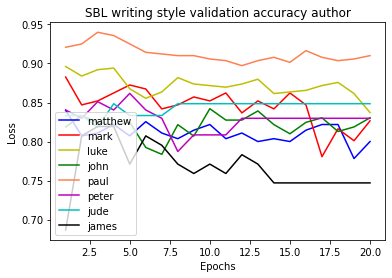

In [64]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('SBL writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Tyndale_version

In [67]:
Matthew = df3[df3.BookName == 'Matthew']
Matthew['Author'] = 'Matthew'
Mark = df3[df3.BookName == 'Mark']
Mark['Author'] = 'Mark'
Luke = df3[df3.BookName == 'Luke']
Luke['Author'] = 'Luke'
John = df3[df3.BookName == 'John']
John['Author'] = 'John'
Acts = df3[df3.BookName == 'Acta']
Acts['Author'] = 'Luke'
Luke_Book = pd.concat([Luke,Acts],axis = 0)
James = df3[df3.BookName == 'Jamss']
James['Author'] = 'James'
f_Peter = df3[df3.BookName == '1Peter']
s_Peter = df3[df3.BookName == '2Peter']
f_Peter['Author'] = 'Peter'
s_Peter['Author'] = 'Peter'
Peter_letter = pd.concat([f_Peter, s_Peter], axis = 0)

f_John = df3[df3.BookName == '1John']
s_John = df3[df3.BookName == '2John']
t_John = df3[df3.BookName == '3John']
f_John['Author'] = 'John'
s_John['Author'] = 'John'
t_John['Author'] = 'John'
John_letter = pd.concat([f_John, s_John, t_John], axis = 0)

Jude = df3[df3.BookName == 'Jude']
Jude['Author'] = 'Jude'
Rev = df3[df3.BookName == 'Revelation']
Rev['Author'] = 'John'
John_Book = pd.concat([John,John_letter,Rev],axis = 0)

In [68]:
Romans = df3[df3.BookName == 'Romans']
Romans['Author'] = 'Paul'
f_cor = df3[df3.BookName == '1Corinthians']
f_cor['Author'] = 'Paul'
s_cor = df3[df3.BookName == '2Corinthians']
s_cor['Author'] = 'Paul'
Gal = df3[df3.BookName == 'Galatians']
Gal['Author'] = 'Paul'
Eph = df3[df3.BookName == 'Ephesians']
Eph['Author'] = 'Paul'
Phi = df3[df3.BookName == 'Philippians']
Phi['Author'] = 'Paul'
Col = df3[df3.BookName == 'Colossians']
Col['Author'] = 'Paul'
f_the = df3[df3.BookName == '1Thessalonians']
f_the['Author'] = 'Paul'
s_the = df3[df3.BookName == '2Thessalonians']
s_the['Author'] = 'Paul'
f_tim = df3[df3.BookName == '1Timothy']
f_tim['Author'] = 'Paul'
s_tim = df3[df3.BookName == '2Timothy']
s_tim['Author'] = 'Paul'
Titus = df3[df3.BookName == 'Titus']
Titus['Author'] = 'Paul'
Philemon = df3[df3.BookName == 'Philemon']
Philemon['Author'] = 'Paul'
Paul_letters = pd.concat([Romans,f_cor,s_cor,Gal,Eph,Phi,Col,f_the,s_the,f_tim,s_tim,Titus,Philemon],axis = 0)
Heb = df3[df3.BookName == 'Hebrews']
Heb['Author'] = 'Paul?'

In [69]:
g1 = cosine_text(Matthew)
g2 = cosine_text(Mark)
g3 = cosine_text(Luke)
g4 = cosine_text(John)
acts = cosine_text(Acts)
rms = cosine_text(Romans)
fcor = cosine_text(f_cor)
scor = cosine_text(s_cor)
gal = cosine_text(Gal)
eph = cosine_text(Eph)
phi = cosine_text(Phi)
col = cosine_text(Col)
fthe = cosine_text(f_the)
sthe = cosine_text(s_the)
ftim = cosine_text(f_tim)
stim = cosine_text(s_tim)
titus = cosine_text(Titus)
philemon = cosine_text(Philemon)
jams = cosine_text(James)
fpet = cosine_text(f_Peter)
spet = cosine_text(s_Peter)
fjohn = cosine_text(f_John)
sjohn = cosine_text(s_John)
tjohn = cosine_text(t_John.dropna())
jud = cosine_text(Jude)
rev = cosine_text(Rev)

In [70]:
g11 = text_author(Matthew)
g21 = text_author(Mark)
g31 = text_author(Luke)
g41 = text_author(John)
acts1 = text_author(Acts)
rms1 = text_author(Romans)
fcor1 = text_author(f_cor)
scor1 = text_author(s_cor)
gal1 = text_author(Gal)
eph1 = text_author(Eph)
phi1 = text_author(Phi)
col1 = text_author(Col)
fthe1 = text_author(f_the)
sthe1 = text_author(s_the)
ftim1 = text_author(f_tim)
stim1 = text_author(s_tim)
titus1 = text_author(Titus)
philemon1 = text_author(Philemon)
jams1 = text_author(James)
fpet1 = text_author(f_Peter)
spet1 = text_author(s_Peter)
fjohn1 = text_author(f_John)
sjohn1 = text_author(s_John)
tjohn1 = text_author(t_John.dropna())
jud1 = text_author(Jude)
rev1 = text_author(Rev)

In [71]:
mat = model_output(g1,g11)

Epoch 1/20
35/35 [==============================] - 3s 100ms/step - loss: 3.4433 - accuracy: 0.7572 - val_loss: 2.6838 - val_accuracy: 0.8080
Epoch 2/20
35/35 [==============================] - 2s 52ms/step - loss: 3.3659 - accuracy: 0.7717 - val_loss: 2.6918 - val_accuracy: 0.8116
Epoch 3/20
35/35 [==============================] - 2s 52ms/step - loss: 3.3287 - accuracy: 0.7772 - val_loss: 2.7371 - val_accuracy: 0.8080
Epoch 4/20
35/35 [==============================] - 2s 53ms/step - loss: 3.3102 - accuracy: 0.7799 - val_loss: 2.7191 - val_accuracy: 0.7935
Epoch 5/20
35/35 [==============================] - 2s 53ms/step - loss: 3.2816 - accuracy: 0.7817 - val_loss: 2.6238 - val_accuracy: 0.8188
Epoch 6/20
35/35 [==============================] - 2s 53ms/step - loss: 3.1993 - accuracy: 0.7808 - val_loss: 2.4370 - val_accuracy: 0.8225
Epoch 7/20
35/35 [==============================] - 2s 53ms/step - loss: 3.1351 - accuracy: 0.7889 - val_loss: 2.4764 - val_accuracy: 0.8225
Epoch 8/20
3

In [72]:
mak = model_output(g2,g21)

Epoch 1/20
25/25 [==============================] - 3s 115ms/step - loss: 4.0607 - accuracy: 0.6955 - val_loss: 4.5756 - val_accuracy: 0.6701
Epoch 2/20
25/25 [==============================] - 1s 52ms/step - loss: 3.9802 - accuracy: 0.7325 - val_loss: 4.2743 - val_accuracy: 0.6853
Epoch 3/20
25/25 [==============================] - 1s 53ms/step - loss: 3.8926 - accuracy: 0.7338 - val_loss: 4.1209 - val_accuracy: 0.6904
Epoch 4/20
25/25 [==============================] - 1s 52ms/step - loss: 3.7320 - accuracy: 0.7376 - val_loss: 3.9518 - val_accuracy: 0.6802
Epoch 5/20
25/25 [==============================] - 1s 51ms/step - loss: 3.6484 - accuracy: 0.7389 - val_loss: 3.9672 - val_accuracy: 0.7056
Epoch 6/20
25/25 [==============================] - 1s 53ms/step - loss: 3.3857 - accuracy: 0.7605 - val_loss: 3.9737 - val_accuracy: 0.7056
Epoch 7/20
25/25 [==============================] - 1s 53ms/step - loss: 3.3315 - accuracy: 0.7656 - val_loss: 4.0287 - val_accuracy: 0.7056
Epoch 8/20
2

In [73]:
luk = model_output(g3,g31)

Epoch 1/20
37/37 [==============================] - 4s 95ms/step - loss: 2.6263 - accuracy: 0.8022 - val_loss: 2.4938 - val_accuracy: 0.8185
Epoch 2/20
37/37 [==============================] - 2s 55ms/step - loss: 2.4779 - accuracy: 0.8236 - val_loss: 2.6328 - val_accuracy: 0.8185
Epoch 3/20
37/37 [==============================] - 2s 54ms/step - loss: 2.3485 - accuracy: 0.8373 - val_loss: 2.7634 - val_accuracy: 0.8048
Epoch 4/20
37/37 [==============================] - 2s 55ms/step - loss: 2.3336 - accuracy: 0.8425 - val_loss: 2.5228 - val_accuracy: 0.8082
Epoch 5/20
37/37 [==============================] - 2s 54ms/step - loss: 2.2454 - accuracy: 0.8502 - val_loss: 2.5370 - val_accuracy: 0.8151
Epoch 6/20
37/37 [==============================] - 2s 54ms/step - loss: 2.2191 - accuracy: 0.8502 - val_loss: 2.6434 - val_accuracy: 0.8082
Epoch 7/20
37/37 [==============================] - 2s 55ms/step - loss: 2.1261 - accuracy: 0.8527 - val_loss: 2.4793 - val_accuracy: 0.8082
Epoch 8/20
37

In [74]:
joh = model_output(g4,g41)

Epoch 1/20
30/30 [==============================] - 3s 106ms/step - loss: 2.5639 - accuracy: 0.8140 - val_loss: 3.2328 - val_accuracy: 0.7679
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 2.4500 - accuracy: 0.8351 - val_loss: 3.3980 - val_accuracy: 0.7553
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 2.3749 - accuracy: 0.8288 - val_loss: 3.1106 - val_accuracy: 0.7595
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 2.2423 - accuracy: 0.8467 - val_loss: 3.0449 - val_accuracy: 0.7679
Epoch 5/20
30/30 [==============================] - 2s 55ms/step - loss: 2.1437 - accuracy: 0.8531 - val_loss: 3.3951 - val_accuracy: 0.7595
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 2.1024 - accuracy: 0.8541 - val_loss: 3.1679 - val_accuracy: 0.7637
Epoch 7/20
30/30 [==============================] - 2s 55ms/step - loss: 2.0069 - accuracy: 0.8531 - val_loss: 2.9906 - val_accuracy: 0.7553
Epoch 8/20
3

In [75]:
act = model_output(acts,acts1)

Epoch 1/20
8/8 [==============================] - 2s 241ms/step - loss: 6.3633 - accuracy: 0.4938 - val_loss: 2.3050 - val_accuracy: 0.8197
Epoch 2/20
8/8 [==============================] - 0s 51ms/step - loss: 3.5602 - accuracy: 0.7243 - val_loss: 1.0924 - val_accuracy: 0.8852
Epoch 3/20
8/8 [==============================] - 0s 49ms/step - loss: 2.5364 - accuracy: 0.8025 - val_loss: 0.8062 - val_accuracy: 0.9344
Epoch 4/20
8/8 [==============================] - 0s 52ms/step - loss: 1.8231 - accuracy: 0.8477 - val_loss: 0.7730 - val_accuracy: 0.9344
Epoch 5/20
8/8 [==============================] - 0s 49ms/step - loss: 1.4713 - accuracy: 0.8971 - val_loss: 0.7668 - val_accuracy: 0.9508
Epoch 6/20
8/8 [==============================] - 0s 52ms/step - loss: 1.3898 - accuracy: 0.9053 - val_loss: 0.5339 - val_accuracy: 0.9508
Epoch 7/20
8/8 [==============================] - 0s 51ms/step - loss: 1.3806 - accuracy: 0.9095 - val_loss: 0.5339 - val_accuracy: 0.9508
Epoch 8/20
8/8 [==========

In [76]:
rom = model_output(rms,rms1)

Epoch 1/20
19/19 [==============================] - 3s 132ms/step - loss: 6.3360 - accuracy: 0.5185 - val_loss: 4.6380 - val_accuracy: 0.5973
Epoch 2/20
19/19 [==============================] - 1s 56ms/step - loss: 4.8951 - accuracy: 0.5859 - val_loss: 4.9944 - val_accuracy: 0.5839
Epoch 3/20
19/19 [==============================] - 1s 53ms/step - loss: 4.1287 - accuracy: 0.6599 - val_loss: 4.5111 - val_accuracy: 0.6040
Epoch 4/20
19/19 [==============================] - 1s 53ms/step - loss: 3.9879 - accuracy: 0.6953 - val_loss: 4.4821 - val_accuracy: 0.5839
Epoch 5/20
19/19 [==============================] - 1s 54ms/step - loss: 3.5559 - accuracy: 0.7273 - val_loss: 5.3456 - val_accuracy: 0.5638
Epoch 6/20
19/19 [==============================] - 1s 54ms/step - loss: 3.3441 - accuracy: 0.7391 - val_loss: 5.3462 - val_accuracy: 0.5906
Epoch 7/20
19/19 [==============================] - 1s 53ms/step - loss: 3.1718 - accuracy: 0.7492 - val_loss: 5.3600 - val_accuracy: 0.5638
Epoch 8/20
1

In [77]:
fcr = model_output(fcor,fcor1)

Epoch 1/20
19/19 [==============================] - 3s 134ms/step - loss: 4.1225 - accuracy: 0.6460 - val_loss: 4.1461 - val_accuracy: 0.6267
Epoch 2/20
19/19 [==============================] - 1s 53ms/step - loss: 3.7257 - accuracy: 0.7097 - val_loss: 3.9701 - val_accuracy: 0.6267
Epoch 3/20
19/19 [==============================] - 1s 53ms/step - loss: 3.2203 - accuracy: 0.7349 - val_loss: 4.0087 - val_accuracy: 0.6600
Epoch 4/20
19/19 [==============================] - 1s 54ms/step - loss: 2.9805 - accuracy: 0.7668 - val_loss: 3.8947 - val_accuracy: 0.6467
Epoch 5/20
19/19 [==============================] - 1s 53ms/step - loss: 2.8990 - accuracy: 0.7970 - val_loss: 3.6303 - val_accuracy: 0.6733
Epoch 6/20
19/19 [==============================] - 1s 54ms/step - loss: 2.8105 - accuracy: 0.7852 - val_loss: 4.2960 - val_accuracy: 0.6333
Epoch 7/20
19/19 [==============================] - 1s 53ms/step - loss: 2.8016 - accuracy: 0.8003 - val_loss: 3.7441 - val_accuracy: 0.6400
Epoch 8/20
1

In [78]:
scr = model_output(scor,scor1)

Epoch 1/20
15/15 [==============================] - 2s 150ms/step - loss: 3.7529 - accuracy: 0.7038 - val_loss: 3.7381 - val_accuracy: 0.6637
Epoch 2/20
15/15 [==============================] - 1s 51ms/step - loss: 3.3513 - accuracy: 0.7439 - val_loss: 3.9708 - val_accuracy: 0.6726
Epoch 3/20
15/15 [==============================] - 1s 52ms/step - loss: 3.0746 - accuracy: 0.7728 - val_loss: 3.5724 - val_accuracy: 0.6903
Epoch 4/20
15/15 [==============================] - 1s 52ms/step - loss: 2.9289 - accuracy: 0.7840 - val_loss: 3.4496 - val_accuracy: 0.6903
Epoch 5/20
15/15 [==============================] - 1s 51ms/step - loss: 2.7980 - accuracy: 0.8085 - val_loss: 3.5622 - val_accuracy: 0.6991
Epoch 6/20
15/15 [==============================] - 1s 51ms/step - loss: 2.7588 - accuracy: 0.8129 - val_loss: 3.5683 - val_accuracy: 0.6726
Epoch 7/20
15/15 [==============================] - 1s 51ms/step - loss: 2.7347 - accuracy: 0.8218 - val_loss: 3.4736 - val_accuracy: 0.6903
Epoch 8/20
1

In [79]:
glt = model_output(gal,gal1)

Epoch 1/20
12/12 [==============================] - 2s 177ms/step - loss: 3.9575 - accuracy: 0.6860 - val_loss: 3.7279 - val_accuracy: 0.7033
Epoch 2/20
12/12 [==============================] - 1s 52ms/step - loss: 3.4979 - accuracy: 0.7245 - val_loss: 3.2814 - val_accuracy: 0.7033
Epoch 3/20
12/12 [==============================] - 1s 53ms/step - loss: 3.3886 - accuracy: 0.7521 - val_loss: 3.3394 - val_accuracy: 0.7033
Epoch 4/20
12/12 [==============================] - 1s 53ms/step - loss: 3.1895 - accuracy: 0.7713 - val_loss: 3.3485 - val_accuracy: 0.7033
Epoch 5/20
12/12 [==============================] - 1s 51ms/step - loss: 3.1606 - accuracy: 0.7824 - val_loss: 3.3426 - val_accuracy: 0.7033
Epoch 6/20
12/12 [==============================] - 1s 54ms/step - loss: 3.1150 - accuracy: 0.7906 - val_loss: 3.3462 - val_accuracy: 0.7033
Epoch 7/20
12/12 [==============================] - 1s 53ms/step - loss: 3.0975 - accuracy: 0.7989 - val_loss: 3.3425 - val_accuracy: 0.7033
Epoch 8/20
1

In [80]:
ept = model_output(eph,eph1)

Epoch 1/20
12/12 [==============================] - 2s 176ms/step - loss: 2.9521 - accuracy: 0.7575 - val_loss: 3.6153 - val_accuracy: 0.6957
Epoch 2/20
12/12 [==============================] - 1s 53ms/step - loss: 2.7011 - accuracy: 0.8147 - val_loss: 3.6404 - val_accuracy: 0.6957
Epoch 3/20
12/12 [==============================] - 1s 52ms/step - loss: 2.6802 - accuracy: 0.8229 - val_loss: 3.6367 - val_accuracy: 0.7065
Epoch 4/20
12/12 [==============================] - 1s 52ms/step - loss: 2.6739 - accuracy: 0.8256 - val_loss: 3.6285 - val_accuracy: 0.7065
Epoch 5/20
12/12 [==============================] - 1s 53ms/step - loss: 2.6733 - accuracy: 0.8256 - val_loss: 3.6375 - val_accuracy: 0.7174
Epoch 6/20
12/12 [==============================] - 1s 53ms/step - loss: 2.6732 - accuracy: 0.8256 - val_loss: 3.6375 - val_accuracy: 0.7174
Epoch 7/20
12/12 [==============================] - 1s 52ms/step - loss: 2.6732 - accuracy: 0.8256 - val_loss: 3.6375 - val_accuracy: 0.7174
Epoch 8/20
1

In [81]:
plp = model_output(phi,phi1)

Epoch 1/20
11/11 [==============================] - 2s 191ms/step - loss: 3.0175 - accuracy: 0.7462 - val_loss: 2.3979 - val_accuracy: 0.7805
Epoch 2/20
11/11 [==============================] - 1s 53ms/step - loss: 2.8126 - accuracy: 0.7982 - val_loss: 2.9468 - val_accuracy: 0.7195
Epoch 3/20
11/11 [==============================] - 1s 53ms/step - loss: 2.7365 - accuracy: 0.8165 - val_loss: 3.1178 - val_accuracy: 0.7317
Epoch 4/20
11/11 [==============================] - 1s 52ms/step - loss: 2.6760 - accuracy: 0.8226 - val_loss: 2.9879 - val_accuracy: 0.7195
Epoch 5/20
11/11 [==============================] - 1s 53ms/step - loss: 2.6144 - accuracy: 0.8104 - val_loss: 3.2614 - val_accuracy: 0.7439
Epoch 6/20
11/11 [==============================] - 1s 51ms/step - loss: 2.3319 - accuracy: 0.8379 - val_loss: 3.1026 - val_accuracy: 0.7317
Epoch 7/20
11/11 [==============================] - 1s 53ms/step - loss: 2.3046 - accuracy: 0.8440 - val_loss: 3.2664 - val_accuracy: 0.7317
Epoch 8/20
1

In [82]:
cls = model_output(col,col1)

Epoch 1/20
10/10 [==============================] - 2s 202ms/step - loss: 2.7655 - accuracy: 0.7649 - val_loss: 3.3101 - val_accuracy: 0.7625
Epoch 2/20
10/10 [==============================] - 1s 54ms/step - loss: 2.4583 - accuracy: 0.8276 - val_loss: 3.1141 - val_accuracy: 0.7750
Epoch 3/20
10/10 [==============================] - 1s 53ms/step - loss: 2.3318 - accuracy: 0.8370 - val_loss: 3.1007 - val_accuracy: 0.7875
Epoch 4/20
10/10 [==============================] - 1s 55ms/step - loss: 2.2735 - accuracy: 0.8495 - val_loss: 3.1098 - val_accuracy: 0.7875
Epoch 5/20
10/10 [==============================] - 1s 53ms/step - loss: 2.3886 - accuracy: 0.8339 - val_loss: 2.9771 - val_accuracy: 0.7625
Epoch 6/20
10/10 [==============================] - 1s 53ms/step - loss: 2.3200 - accuracy: 0.8433 - val_loss: 3.1084 - val_accuracy: 0.7875
Epoch 7/20
10/10 [==============================] - 1s 54ms/step - loss: 2.2626 - accuracy: 0.8495 - val_loss: 3.1026 - val_accuracy: 0.7875
Epoch 8/20
1

In [83]:
ftl = model_output(fthe,fthe1)

Epoch 1/20
10/10 [==============================] - 5s 467ms/step - loss: 2.7142 - accuracy: 0.7778 - val_loss: 1.6134 - val_accuracy: 0.8101
Epoch 2/20
10/10 [==============================] - 1s 54ms/step - loss: 2.5639 - accuracy: 0.8159 - val_loss: 1.6839 - val_accuracy: 0.8228
Epoch 3/20
10/10 [==============================] - 1s 54ms/step - loss: 2.2389 - accuracy: 0.8286 - val_loss: 2.0998 - val_accuracy: 0.7848
Epoch 4/20
10/10 [==============================] - 1s 55ms/step - loss: 2.0336 - accuracy: 0.8603 - val_loss: 2.0830 - val_accuracy: 0.7975
Epoch 5/20
10/10 [==============================] - 1s 53ms/step - loss: 1.8650 - accuracy: 0.8571 - val_loss: 1.9181 - val_accuracy: 0.7848
Epoch 6/20
10/10 [==============================] - 1s 55ms/step - loss: 1.8594 - accuracy: 0.8794 - val_loss: 1.9681 - val_accuracy: 0.7848
Epoch 7/20
10/10 [==============================] - 1s 55ms/step - loss: 1.8531 - accuracy: 0.8794 - val_loss: 1.9516 - val_accuracy: 0.7848
Epoch 8/20
1

In [84]:
stl = model_output(sthe,sthe1)

Epoch 1/20
9/9 [==============================] - 2s 220ms/step - loss: 2.1053 - accuracy: 0.8286 - val_loss: 3.3161 - val_accuracy: 0.7183
Epoch 2/20
9/9 [==============================] - 0s 53ms/step - loss: 1.8470 - accuracy: 0.8500 - val_loss: 2.5645 - val_accuracy: 0.7465
Epoch 3/20
9/9 [==============================] - 0s 52ms/step - loss: 1.5689 - accuracy: 0.8857 - val_loss: 2.7806 - val_accuracy: 0.7606
Epoch 4/20
9/9 [==============================] - 0s 54ms/step - loss: 1.5369 - accuracy: 0.9000 - val_loss: 3.1035 - val_accuracy: 0.7606
Epoch 5/20
9/9 [==============================] - 0s 52ms/step - loss: 1.5350 - accuracy: 0.9000 - val_loss: 2.9358 - val_accuracy: 0.7606
Epoch 6/20
9/9 [==============================] - 0s 54ms/step - loss: 1.5350 - accuracy: 0.9000 - val_loss: 2.9358 - val_accuracy: 0.7606
Epoch 7/20
9/9 [==============================] - 0s 54ms/step - loss: 1.5350 - accuracy: 0.9000 - val_loss: 2.9358 - val_accuracy: 0.7606
Epoch 8/20
9/9 [==========

In [85]:
ftm = model_output(ftim,ftim1)

Epoch 1/20
11/11 [==============================] - 2s 189ms/step - loss: 4.0741 - accuracy: 0.7015 - val_loss: 4.0591 - val_accuracy: 0.7262
Epoch 2/20
11/11 [==============================] - 1s 54ms/step - loss: 3.8959 - accuracy: 0.7343 - val_loss: 4.2338 - val_accuracy: 0.7262
Epoch 3/20
11/11 [==============================] - 1s 56ms/step - loss: 3.8287 - accuracy: 0.7433 - val_loss: 4.2366 - val_accuracy: 0.7143
Epoch 4/20
11/11 [==============================] - 1s 55ms/step - loss: 3.6570 - accuracy: 0.7552 - val_loss: 4.2279 - val_accuracy: 0.7262
Epoch 5/20
11/11 [==============================] - 1s 55ms/step - loss: 3.6363 - accuracy: 0.7612 - val_loss: 4.2319 - val_accuracy: 0.7262
Epoch 6/20
11/11 [==============================] - 1s 54ms/step - loss: 3.6321 - accuracy: 0.7642 - val_loss: 4.2299 - val_accuracy: 0.7262
Epoch 7/20
11/11 [==============================] - 1s 53ms/step - loss: 3.6318 - accuracy: 0.7642 - val_loss: 4.2299 - val_accuracy: 0.7262
Epoch 8/20
1

In [86]:
stm = model_output(stim,stim1)

Epoch 1/20
10/10 [==============================] - 2s 207ms/step - loss: 2.9948 - accuracy: 0.7774 - val_loss: 3.0224 - val_accuracy: 0.7564
Epoch 2/20
10/10 [==============================] - 1s 56ms/step - loss: 2.6654 - accuracy: 0.8097 - val_loss: 2.8273 - val_accuracy: 0.7821
Epoch 3/20
10/10 [==============================] - 1s 55ms/step - loss: 2.5409 - accuracy: 0.8355 - val_loss: 2.8220 - val_accuracy: 0.7821
Epoch 4/20
10/10 [==============================] - 1s 56ms/step - loss: 2.5031 - accuracy: 0.8290 - val_loss: 2.8230 - val_accuracy: 0.7821
Epoch 5/20
10/10 [==============================] - 1s 56ms/step - loss: 2.4871 - accuracy: 0.8387 - val_loss: 2.8205 - val_accuracy: 0.7821
Epoch 6/20
10/10 [==============================] - 1s 53ms/step - loss: 2.4851 - accuracy: 0.8387 - val_loss: 2.8205 - val_accuracy: 0.7821
Epoch 7/20
10/10 [==============================] - 1s 56ms/step - loss: 2.4851 - accuracy: 0.8387 - val_loss: 2.8205 - val_accuracy: 0.7821
Epoch 8/20
1

In [87]:
tus = model_output(titus,titus1)

Epoch 1/20
9/9 [==============================] - 2s 221ms/step - loss: 1.8402 - accuracy: 0.8714 - val_loss: 1.7521 - val_accuracy: 0.8873
Epoch 2/20
9/9 [==============================] - 0s 55ms/step - loss: 1.8147 - accuracy: 0.8821 - val_loss: 1.5368 - val_accuracy: 0.8873
Epoch 3/20
9/9 [==============================] - 0s 55ms/step - loss: 1.8148 - accuracy: 0.8821 - val_loss: 1.5662 - val_accuracy: 0.8732
Epoch 4/20
9/9 [==============================] - 0s 55ms/step - loss: 1.8135 - accuracy: 0.8821 - val_loss: 1.5662 - val_accuracy: 0.8732
Epoch 5/20
9/9 [==============================] - 0s 54ms/step - loss: 1.8135 - accuracy: 0.8821 - val_loss: 1.5662 - val_accuracy: 0.8732
Epoch 6/20
9/9 [==============================] - 1s 56ms/step - loss: 1.8135 - accuracy: 0.8821 - val_loss: 1.5662 - val_accuracy: 0.8732
Epoch 7/20
9/9 [==============================] - 0s 55ms/step - loss: 1.8135 - accuracy: 0.8821 - val_loss: 1.5662 - val_accuracy: 0.8732
Epoch 8/20
9/9 [==========

In [88]:
plm = model_output(philemon,philemon1)

Epoch 1/20
9/9 [==============================] - 2s 223ms/step - loss: 1.0221 - accuracy: 0.9202 - val_loss: 1.6520 - val_accuracy: 0.8788
Epoch 2/20
9/9 [==============================] - 0s 55ms/step - loss: 1.0550 - accuracy: 0.9316 - val_loss: 1.6467 - val_accuracy: 0.8788
Epoch 3/20
9/9 [==============================] - 0s 55ms/step - loss: 1.0527 - accuracy: 0.9316 - val_loss: 1.6651 - val_accuracy: 0.8788
Epoch 4/20
9/9 [==============================] - 0s 54ms/step - loss: 1.0524 - accuracy: 0.9316 - val_loss: 1.6651 - val_accuracy: 0.8788
Epoch 5/20
9/9 [==============================] - 1s 57ms/step - loss: 1.0524 - accuracy: 0.9316 - val_loss: 1.6651 - val_accuracy: 0.8788
Epoch 6/20
9/9 [==============================] - 0s 55ms/step - loss: 1.0524 - accuracy: 0.9316 - val_loss: 1.6651 - val_accuracy: 0.8788
Epoch 7/20
9/9 [==============================] - 0s 55ms/step - loss: 1.0524 - accuracy: 0.9316 - val_loss: 1.6651 - val_accuracy: 0.8788
Epoch 8/20
9/9 [==========

In [89]:
jam = model_output(jams,jams1)

Epoch 1/20
8/8 [==============================] - 2s 247ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 2/20
8/8 [==============================] - 0s 55ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 3/20
8/8 [==============================] - 0s 56ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 4/20
8/8 [==============================] - 0s 56ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 5/20
8/8 [==============================] - 0s 55ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 6/20
8/8 [==============================] - 0s 55ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 7/20
8/8 [==============================] - 0s 55ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.7643 - val_accuracy: 0.9344
Epoch 8/20
8/8 [==========

In [90]:
fpt = model_output(fpet,fpet1)

Epoch 1/20
11/11 [==============================] - 2s 196ms/step - loss: 3.1553 - accuracy: 0.7713 - val_loss: 2.6900 - val_accuracy: 0.8049
Epoch 2/20
11/11 [==============================] - 1s 56ms/step - loss: 3.0110 - accuracy: 0.7927 - val_loss: 2.8448 - val_accuracy: 0.8049
Epoch 3/20
11/11 [==============================] - 1s 56ms/step - loss: 2.8874 - accuracy: 0.8049 - val_loss: 2.8472 - val_accuracy: 0.8049
Epoch 4/20
11/11 [==============================] - 1s 57ms/step - loss: 2.6228 - accuracy: 0.8140 - val_loss: 2.4881 - val_accuracy: 0.8171
Epoch 5/20
11/11 [==============================] - 1s 58ms/step - loss: 2.3638 - accuracy: 0.8232 - val_loss: 3.0551 - val_accuracy: 0.7683
Epoch 6/20
11/11 [==============================] - 1s 57ms/step - loss: 2.3553 - accuracy: 0.8262 - val_loss: 2.6816 - val_accuracy: 0.8049
Epoch 7/20
11/11 [==============================] - 1s 57ms/step - loss: 2.1226 - accuracy: 0.8445 - val_loss: 2.7688 - val_accuracy: 0.7683
Epoch 8/20
1

In [91]:
spt = model_output(spet,spet1)

Epoch 1/20
10/10 [==============================] - 2s 208ms/step - loss: 1.8427 - accuracy: 0.8562 - val_loss: 2.8304 - val_accuracy: 0.7671
Epoch 2/20
10/10 [==============================] - 1s 58ms/step - loss: 1.6078 - accuracy: 0.8904 - val_loss: 2.9975 - val_accuracy: 0.7808
Epoch 3/20
10/10 [==============================] - 1s 56ms/step - loss: 1.5446 - accuracy: 0.8973 - val_loss: 2.8125 - val_accuracy: 0.7671
Epoch 4/20
10/10 [==============================] - 1s 57ms/step - loss: 1.5304 - accuracy: 0.9007 - val_loss: 3.0540 - val_accuracy: 0.7671
Epoch 5/20
10/10 [==============================] - 1s 58ms/step - loss: 1.5295 - accuracy: 0.9007 - val_loss: 3.0540 - val_accuracy: 0.7671
Epoch 6/20
10/10 [==============================] - 1s 59ms/step - loss: 1.5295 - accuracy: 0.9007 - val_loss: 3.0540 - val_accuracy: 0.7671
Epoch 7/20
10/10 [==============================] - 1s 59ms/step - loss: 1.5295 - accuracy: 0.9007 - val_loss: 3.0540 - val_accuracy: 0.7671
Epoch 8/20
1

In [92]:
fjn = model_output(fjohn,fjohn1)

Epoch 1/20
11/11 [==============================] - 3s 244ms/step - loss: 2.2702 - accuracy: 0.8140 - val_loss: 2.1672 - val_accuracy: 0.8171
Epoch 2/20
11/11 [==============================] - 1s 63ms/step - loss: 1.6223 - accuracy: 0.8384 - val_loss: 2.8387 - val_accuracy: 0.8171
Epoch 3/20
11/11 [==============================] - 1s 62ms/step - loss: 1.3661 - accuracy: 0.8902 - val_loss: 2.8234 - val_accuracy: 0.8171
Epoch 4/20
11/11 [==============================] - 1s 61ms/step - loss: 1.3266 - accuracy: 0.9085 - val_loss: 2.8209 - val_accuracy: 0.8171
Epoch 5/20
11/11 [==============================] - 1s 60ms/step - loss: 1.2769 - accuracy: 0.9146 - val_loss: 2.6435 - val_accuracy: 0.8171
Epoch 6/20
11/11 [==============================] - 1s 62ms/step - loss: 1.1819 - accuracy: 0.9055 - val_loss: 2.3517 - val_accuracy: 0.8171
Epoch 7/20
11/11 [==============================] - 1s 61ms/step - loss: 1.0913 - accuracy: 0.9268 - val_loss: 2.5039 - val_accuracy: 0.8171
Epoch 8/20
1

In [93]:
sjn = model_output(sjohn,sjohn1)

Epoch 1/20
8/8 [==============================] - 2s 263ms/step - loss: 0.7120 - accuracy: 0.9368 - val_loss: 0.7272 - val_accuracy: 0.9531
Epoch 2/20
8/8 [==============================] - 1s 69ms/step - loss: 0.5501 - accuracy: 0.9605 - val_loss: 0.7272 - val_accuracy: 0.9531
Epoch 3/20
8/8 [==============================] - 1s 67ms/step - loss: 0.5469 - accuracy: 0.9644 - val_loss: 0.7355 - val_accuracy: 0.9375
Epoch 4/20
8/8 [==============================] - 1s 66ms/step - loss: 0.5445 - accuracy: 0.9644 - val_loss: 0.7355 - val_accuracy: 0.9375
Epoch 5/20
8/8 [==============================] - 1s 66ms/step - loss: 0.5445 - accuracy: 0.9644 - val_loss: 0.7355 - val_accuracy: 0.9375
Epoch 6/20
8/8 [==============================] - 1s 65ms/step - loss: 0.5445 - accuracy: 0.9644 - val_loss: 0.7355 - val_accuracy: 0.9375
Epoch 7/20
8/8 [==============================] - 1s 66ms/step - loss: 0.5445 - accuracy: 0.9644 - val_loss: 0.7355 - val_accuracy: 0.9375
Epoch 8/20
8/8 [==========

In [94]:
tjn = model_output(tjohn,tjohn1)

Epoch 1/20
8/8 [==============================] - 2s 261ms/step - loss: 0.6318 - accuracy: 0.9412 - val_loss: 0.9558 - val_accuracy: 0.9375
Epoch 2/20
8/8 [==============================] - 1s 68ms/step - loss: 0.5488 - accuracy: 0.9608 - val_loss: 0.9558 - val_accuracy: 0.9375
Epoch 3/20
8/8 [==============================] - 1s 69ms/step - loss: 0.5426 - accuracy: 0.9647 - val_loss: 0.9742 - val_accuracy: 0.9219
Epoch 4/20
8/8 [==============================] - 1s 69ms/step - loss: 0.5417 - accuracy: 0.9647 - val_loss: 0.9742 - val_accuracy: 0.9219
Epoch 5/20
8/8 [==============================] - 1s 68ms/step - loss: 0.5417 - accuracy: 0.9647 - val_loss: 0.9742 - val_accuracy: 0.9219
Epoch 6/20
8/8 [==============================] - 1s 67ms/step - loss: 0.5417 - accuracy: 0.9647 - val_loss: 0.9742 - val_accuracy: 0.9219
Epoch 7/20
8/8 [==============================] - 1s 72ms/step - loss: 0.5417 - accuracy: 0.9647 - val_loss: 0.9742 - val_accuracy: 0.9219
Epoch 8/20
8/8 [==========

In [95]:
jde = model_output(jud,jud1)

Epoch 1/20
9/9 [==============================] - 2s 237ms/step - loss: 1.3628 - accuracy: 0.8859 - val_loss: 2.1292 - val_accuracy: 0.8485
Epoch 2/20
9/9 [==============================] - 1s 67ms/step - loss: 1.1344 - accuracy: 0.9202 - val_loss: 2.1238 - val_accuracy: 0.8485
Epoch 3/20
9/9 [==============================] - 1s 63ms/step - loss: 1.0657 - accuracy: 0.9278 - val_loss: 2.1221 - val_accuracy: 0.8485
Epoch 4/20
9/9 [==============================] - 1s 63ms/step - loss: 1.0568 - accuracy: 0.9316 - val_loss: 2.1178 - val_accuracy: 0.8485
Epoch 5/20
9/9 [==============================] - 1s 67ms/step - loss: 1.0543 - accuracy: 0.9316 - val_loss: 2.1168 - val_accuracy: 0.8636
Epoch 6/20
9/9 [==============================] - 1s 64ms/step - loss: 1.0533 - accuracy: 0.9316 - val_loss: 2.1161 - val_accuracy: 0.8636
Epoch 7/20
9/9 [==============================] - 1s 64ms/step - loss: 1.0530 - accuracy: 0.9316 - val_loss: 2.1161 - val_accuracy: 0.8636
Epoch 8/20
9/9 [==========

In [96]:
rvl = model_output(rev,rev1)

Epoch 1/20
18/18 [==============================] - 3s 158ms/step - loss: 4.9624 - accuracy: 0.5958 - val_loss: 4.5199 - val_accuracy: 0.6643
Epoch 2/20
18/18 [==============================] - 1s 70ms/step - loss: 3.6103 - accuracy: 0.7153 - val_loss: 4.2432 - val_accuracy: 0.6783
Epoch 3/20
18/18 [==============================] - 1s 69ms/step - loss: 3.4010 - accuracy: 0.7276 - val_loss: 4.6198 - val_accuracy: 0.6364
Epoch 4/20
18/18 [==============================] - 1s 70ms/step - loss: 2.9729 - accuracy: 0.7627 - val_loss: 4.2799 - val_accuracy: 0.6154
Epoch 5/20
18/18 [==============================] - 1s 71ms/step - loss: 2.8405 - accuracy: 0.7979 - val_loss: 3.8632 - val_accuracy: 0.6364
Epoch 6/20
18/18 [==============================] - 1s 71ms/step - loss: 2.7076 - accuracy: 0.8049 - val_loss: 3.9813 - val_accuracy: 0.6364
Epoch 7/20
18/18 [==============================] - 1s 72ms/step - loss: 2.6651 - accuracy: 0.8190 - val_loss: 3.6604 - val_accuracy: 0.6434
Epoch 8/20
1

In [97]:
from pandas.core.frame import DataFrame
df_loss = {'Matthew':mat.history['loss'],'Mark':mak.history['loss'],'Luke':luk.history['loss'],'John':joh.history['loss'],
           'Acts':act.history['loss'],'Romans':rom.history['loss'],'1Cor':fcr.history['loss'],'2Cor':scr.history['loss'],'Gal':glt.history['loss'],
           'Eph':ept.history['loss'],'Phl':plp.history['loss'],'Col':cls.history['loss'],'1The':ftl.history['loss'],'2The':stl.history['loss'],
           '1Tim':ftm.history['loss'],'2Tim':stm.history['loss'],'Titus':tus.history['loss'],'Phi':plm.history['loss'],'James':jam.history['loss'],
           '1Peter':fpt.history['loss'],'2Peter':spt.history['loss'],'1John':fjn.history['loss'],'2John':sjn.history['loss'],'3John':tjn.history['loss'],
           'Jude':jde.history['loss'],'Rev':rvl.history['loss']}
tyn_loss = DataFrame(df_loss)

df_val_loss = {'Matthew':mat.history['val_loss'],'Mark':mak.history['val_loss'],'Luke':luk.history['val_loss'],'John':joh.history['val_loss'],
           'Acts':act.history['val_loss'],'Romans':rom.history['val_loss'],'1Cor':fcr.history['val_loss'],'2Cor':scr.history['val_loss'],'Gal':glt.history['val_loss'],
           'Eph':ept.history['val_loss'],'Phl':plp.history['val_loss'],'Col':cls.history['val_loss'],'1The':ftl.history['val_loss'],'2The':stl.history['val_loss'],
           '1Tim':ftm.history['val_loss'],'2Tim':stm.history['val_loss'],'Titus':tus.history['val_loss'],'Phi':plm.history['val_loss'],'James':jam.history['val_loss'],
           '1Peter':fpt.history['val_loss'],'2Peter':spt.history['val_loss'],'1John':fjn.history['val_loss'],'2John':sjn.history['val_loss'],'3John':tjn.history['val_loss'],
           'Jude':jde.history['val_loss'],'Rev':rvl.history['val_loss']}
tyn_val_loss = DataFrame(df_val_loss)

df_accuracy = {'Matthew':mat.history['accuracy'],'Mark':mak.history['accuracy'],'Luke':luk.history['accuracy'],'John':joh.history['accuracy'],
           'Acts':act.history['accuracy'],'Romans':rom.history['accuracy'],'1Cor':fcr.history['accuracy'],'2Cor':scr.history['accuracy'],'Gal':glt.history['accuracy'],
           'Eph':ept.history['accuracy'],'Phl':plp.history['accuracy'],'Col':cls.history['accuracy'],'1The':ftl.history['accuracy'],'2The':stl.history['accuracy'],
           '1Tim':ftm.history['accuracy'],'2Tim':stm.history['accuracy'],'Titus':tus.history['accuracy'],'Phi':plm.history['accuracy'],'James':jam.history['accuracy'],
           '1Peter':fpt.history['accuracy'],'2Peter':spt.history['accuracy'],'1John':fjn.history['accuracy'],'2John':sjn.history['accuracy'],'3John':tjn.history['accuracy'],
           'Jude':jde.history['accuracy'],'Rev':rvl.history['accuracy']}
tyn_accuracy = DataFrame(df_accuracy)

df_val_accuracy = {'Matthew':mat.history['val_accuracy'],'Mark':mak.history['val_accuracy'],'Luke':luk.history['val_accuracy'],'John':joh.history['val_accuracy'],
           'Acts':act.history['val_accuracy'],'Romans':rom.history['val_accuracy'],'1Cor':fcr.history['val_accuracy'],'2Cor':scr.history['val_accuracy'],'Gal':glt.history['val_accuracy'],
           'Eph':ept.history['val_accuracy'],'Phl':plp.history['val_accuracy'],'Col':cls.history['val_accuracy'],'1The':ftl.history['val_accuracy'],'2The':stl.history['val_accuracy'],
           '1Tim':ftm.history['val_accuracy'],'2Tim':stm.history['val_accuracy'],'Titus':tus.history['val_accuracy'],'Phi':plm.history['val_accuracy'],'James':jam.history['val_accuracy'],
           '1Peter':fpt.history['val_accuracy'],'2Peter':spt.history['val_accuracy'],'1John':fjn.history['val_accuracy'],'2John':sjn.history['val_accuracy'],'3John':tjn.history['val_accuracy'],
           'Jude':jde.history['val_accuracy'],'Rev':rvl.history['val_accuracy']}
tyn_val_accuracy = DataFrame(df_val_accuracy)

In [98]:
tyn_loss.to_excel('Tyndale LOSS.xlsx',encoding = 'utf-8', index = False)
tyn_accuracy.to_excel('Tyndale ACCURACY.xlsx',encoding = 'utf-8', index = False)  
tyn_val_loss.to_excel('Tyndale VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
tyn_val_accuracy.to_excel('Tyndale VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False) 

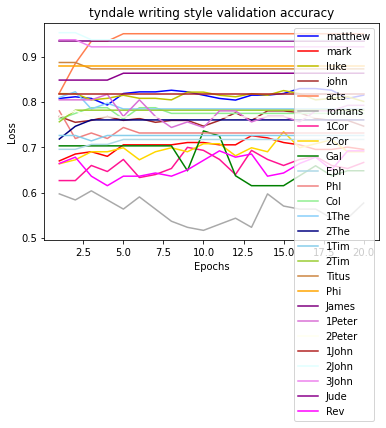

In [99]:
import matplotlib.pyplot as plt

matvac = mat.history['val_accuracy']
makvac = mak.history['val_accuracy']
lukvac = luk.history['val_accuracy']
johvac = joh.history['val_accuracy']
actvac = act.history['val_accuracy']
romvac = rom.history['val_accuracy']
fcrvac = fcr.history['val_accuracy']
scrvac = scr.history['val_accuracy']
gltvac = glt.history['val_accuracy']
eptvac = ept.history['val_accuracy']
plpvac = plp.history['val_accuracy']
clsvac = cls.history['val_accuracy']
ftlvac = ftl.history['val_accuracy']
stlvac = stl.history['val_accuracy']
ftmvac = ftm.history['val_accuracy']
stmvac = stm.history['val_accuracy']
tusvac = tus.history['val_accuracy']
plmvac = plm.history['val_accuracy']
jamvac = jam.history['val_accuracy']
fptvac = fpt.history['val_accuracy']
sptvac = spt.history['val_accuracy']
fjnvac = fjn.history['val_accuracy']
sjnvac = sjn.history['val_accuracy']
tjnvac = tjn.history['val_accuracy']
jdevac = jde.history['val_accuracy']
rvlvac = rvl.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matvac, 'b', label='matthew')
plt.plot(epochs, makvac, 'r', label='mark')
plt.plot(epochs, lukvac, 'y', label='luke')
plt.plot(epochs, johvac, 'brown', label='john')
plt.plot(epochs, actvac, 'coral', label='acts')
plt.plot(epochs, romvac, 'darkgray', label='romans')
plt.plot(epochs, fcrvac, 'deeppink', label='1Cor')
plt.plot(epochs, scrvac, 'gold', label='2Cor')
plt.plot(epochs, gltvac, 'green', label='Gal')
plt.plot(epochs, eptvac, 'lightblue', label='Eph')
plt.plot(epochs, plpvac, 'lightcoral', label='Phl')
plt.plot(epochs, clsvac, 'lightgreen', label='Col')
plt.plot(epochs, ftlvac, 'lightskyblue', label='1The')
plt.plot(epochs, stlvac, 'navy', label='2The')
plt.plot(epochs, ftmvac, 'skyblue', label='1Tim')
plt.plot(epochs, stmvac, 'yellowgreen', label='2Tim')
plt.plot(epochs, tusvac, 'peru', label='Titus')
plt.plot(epochs, plmvac, 'orange', label='Phi')
plt.plot(epochs, jamvac, 'purple', label='James')
plt.plot(epochs, fptvac, 'orchid', label='1Peter')
plt.plot(epochs, sptvac, 'ivory', label='2Peter')
plt.plot(epochs, fjnvac, 'firebrick', label='1John')
plt.plot(epochs, sjnvac, 'lightcyan', label='2John')
plt.plot(epochs, tjnvac, 'violet', label='3John')
plt.plot(epochs, jdevac, 'darkmagenta', label='Jude')
plt.plot(epochs, rvlvac, 'magenta', label='Rev')
plt.title('tyndale writing style validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [100]:
mat_s1 = cosine_text(Matthew)
mark_s1 = cosine_text(Mark)
luke_s1 = cosine_text(Luke_Book)
jam_s1 = cosine_text(James)
pet_s1 = cosine_text(Peter_letter)
john_s1 = cosine_text(John_Book.dropna())
jude_s1 = cosine_text(Jude)
pl_s1 = cosine_text(Paul_letters)

In [101]:
mat_s11 = text_author(Matthew)
mark_s11 = text_author(Mark)
luke_s11 = text_author(Luke_Book)
jam_s11 = text_author(James)
pet_s11 = text_author(Peter_letter)
john_s11 = text_author(John_Book.dropna())
jude_s11 = text_author(Jude)
pl_s11 = text_author(Paul_letters)

In [102]:
matthewbook = model_output(mat_s1,mat_s11)

Epoch 1/20
35/35 [==============================] - 4s 116ms/step - loss: 3.6123 - accuracy: 0.6993 - val_loss: 2.6647 - val_accuracy: 0.7971
Epoch 2/20
35/35 [==============================] - 2s 71ms/step - loss: 3.0193 - accuracy: 0.7717 - val_loss: 2.5815 - val_accuracy: 0.7862
Epoch 3/20
35/35 [==============================] - 2s 71ms/step - loss: 2.7647 - accuracy: 0.7953 - val_loss: 2.8882 - val_accuracy: 0.7790
Epoch 4/20
35/35 [==============================] - 2s 69ms/step - loss: 2.6631 - accuracy: 0.8053 - val_loss: 2.5835 - val_accuracy: 0.7935
Epoch 5/20
35/35 [==============================] - 2s 70ms/step - loss: 2.4691 - accuracy: 0.8188 - val_loss: 2.6624 - val_accuracy: 0.7899
Epoch 6/20
35/35 [==============================] - 2s 70ms/step - loss: 2.4177 - accuracy: 0.8297 - val_loss: 2.6961 - val_accuracy: 0.7935
Epoch 7/20
35/35 [==============================] - 2s 69ms/step - loss: 2.3411 - accuracy: 0.8388 - val_loss: 2.7037 - val_accuracy: 0.7717
Epoch 8/20
3

In [103]:
markbook = model_output(mark_s1,mark_s11)

Epoch 1/20
25/25 [==============================] - 3s 135ms/step - loss: 3.3945 - accuracy: 0.7185 - val_loss: 4.2982 - val_accuracy: 0.6802
Epoch 2/20
25/25 [==============================] - 2s 70ms/step - loss: 3.0571 - accuracy: 0.7720 - val_loss: 4.0322 - val_accuracy: 0.6701
Epoch 3/20
25/25 [==============================] - 2s 72ms/step - loss: 2.6594 - accuracy: 0.7783 - val_loss: 3.8334 - val_accuracy: 0.6650
Epoch 4/20
25/25 [==============================] - 2s 73ms/step - loss: 2.2673 - accuracy: 0.8000 - val_loss: 3.9278 - val_accuracy: 0.6802
Epoch 5/20
25/25 [==============================] - 2s 68ms/step - loss: 2.1790 - accuracy: 0.8318 - val_loss: 3.7283 - val_accuracy: 0.6853
Epoch 6/20
25/25 [==============================] - 2s 69ms/step - loss: 2.1144 - accuracy: 0.8408 - val_loss: 3.6574 - val_accuracy: 0.6650
Epoch 7/20
25/25 [==============================] - 2s 68ms/step - loss: 1.9743 - accuracy: 0.8446 - val_loss: 3.6934 - val_accuracy: 0.6751
Epoch 8/20
2

In [104]:
lukebook = model_output(luke_s1,luke_s11)

Epoch 1/20
37/37 [==============================] - 4s 117ms/step - loss: 2.2330 - accuracy: 0.8031 - val_loss: 2.2585 - val_accuracy: 0.8082
Epoch 2/20
37/37 [==============================] - 3s 71ms/step - loss: 1.8166 - accuracy: 0.8570 - val_loss: 2.2262 - val_accuracy: 0.8151
Epoch 3/20
37/37 [==============================] - 3s 72ms/step - loss: 1.7243 - accuracy: 0.8673 - val_loss: 2.1228 - val_accuracy: 0.8048
Epoch 4/20
37/37 [==============================] - 3s 71ms/step - loss: 1.6250 - accuracy: 0.8801 - val_loss: 2.3193 - val_accuracy: 0.8082
Epoch 5/20
37/37 [==============================] - 3s 71ms/step - loss: 1.5399 - accuracy: 0.8801 - val_loss: 2.3390 - val_accuracy: 0.7979
Epoch 6/20
37/37 [==============================] - 3s 71ms/step - loss: 1.4644 - accuracy: 0.8887 - val_loss: 2.2991 - val_accuracy: 0.7705
Epoch 7/20
37/37 [==============================] - 3s 71ms/step - loss: 1.3765 - accuracy: 0.9050 - val_loss: 2.4732 - val_accuracy: 0.7911
Epoch 8/20
3

In [106]:
jams = model_output(jam_s1,jam_s11)

Epoch 1/20
8/8 [==============================] - 2s 268ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 2/20
8/8 [==============================] - 1s 66ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 3/20
8/8 [==============================] - 1s 66ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 4/20
8/8 [==============================] - 1s 69ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 5/20
8/8 [==============================] - 1s 64ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 6/20
8/8 [==============================] - 1s 71ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 7/20
8/8 [==============================] - 1s 71ms/step - loss: 0.2510 - accuracy: 0.9835 - val_loss: 0.0176 - val_accuracy: 0.9836
Epoch 8/20
8/8 [==========

In [107]:
peter = model_output(pet_s1,pet_s11)

Epoch 1/20
12/12 [==============================] - 2s 199ms/step - loss: 4.8160 - accuracy: 0.6596 - val_loss: 4.5766 - val_accuracy: 0.6421
Epoch 2/20
12/12 [==============================] - 1s 69ms/step - loss: 4.5024 - accuracy: 0.6915 - val_loss: 4.6500 - val_accuracy: 0.6632
Epoch 3/20
12/12 [==============================] - 1s 67ms/step - loss: 4.4004 - accuracy: 0.7074 - val_loss: 5.0672 - val_accuracy: 0.6632
Epoch 4/20
12/12 [==============================] - 1s 66ms/step - loss: 4.3211 - accuracy: 0.7154 - val_loss: 4.9486 - val_accuracy: 0.6421
Epoch 5/20
12/12 [==============================] - 1s 67ms/step - loss: 4.2453 - accuracy: 0.7154 - val_loss: 4.8040 - val_accuracy: 0.6211
Epoch 6/20
12/12 [==============================] - 1s 68ms/step - loss: 4.2038 - accuracy: 0.7207 - val_loss: 4.7231 - val_accuracy: 0.6316
Epoch 7/20
12/12 [==============================] - 1s 69ms/step - loss: 4.0781 - accuracy: 0.7287 - val_loss: 4.8252 - val_accuracy: 0.6105
Epoch 8/20
1

In [108]:
johnbook = model_output(john_s1,john_s11)

Epoch 1/20
44/44 [==============================] - 5s 108ms/step - loss: 2.8935 - accuracy: 0.7630 - val_loss: 2.3199 - val_accuracy: 0.8203
Epoch 2/20
44/44 [==============================] - 3s 70ms/step - loss: 1.8335 - accuracy: 0.8609 - val_loss: 2.2530 - val_accuracy: 0.8261
Epoch 3/20
44/44 [==============================] - 3s 71ms/step - loss: 1.6318 - accuracy: 0.8609 - val_loss: 2.4140 - val_accuracy: 0.7768
Epoch 4/20
44/44 [==============================] - 3s 71ms/step - loss: 1.5113 - accuracy: 0.8688 - val_loss: 2.4843 - val_accuracy: 0.7768
Epoch 5/20
44/44 [==============================] - 3s 71ms/step - loss: 1.5308 - accuracy: 0.8790 - val_loss: 2.2594 - val_accuracy: 0.8087
Epoch 6/20
44/44 [==============================] - 3s 70ms/step - loss: 1.3783 - accuracy: 0.8891 - val_loss: 2.2693 - val_accuracy: 0.8000
Epoch 7/20
44/44 [==============================] - 3s 70ms/step - loss: 1.2586 - accuracy: 0.8935 - val_loss: 2.5493 - val_accuracy: 0.7797
Epoch 8/20
4

In [109]:
jude = model_output(jude_s1,jude_s11)

Epoch 1/20
9/9 [==============================] - 2s 247ms/step - loss: 4.2804 - accuracy: 0.6502 - val_loss: 2.7047 - val_accuracy: 0.7727
Epoch 2/20
9/9 [==============================] - 1s 66ms/step - loss: 2.7492 - accuracy: 0.7643 - val_loss: 2.6186 - val_accuracy: 0.8030
Epoch 3/20
9/9 [==============================] - 1s 69ms/step - loss: 2.1489 - accuracy: 0.8327 - val_loss: 2.6089 - val_accuracy: 0.8182
Epoch 4/20
9/9 [==============================] - 1s 66ms/step - loss: 1.9536 - accuracy: 0.8593 - val_loss: 2.2090 - val_accuracy: 0.8182
Epoch 5/20
9/9 [==============================] - 1s 65ms/step - loss: 1.4536 - accuracy: 0.8707 - val_loss: 2.1443 - val_accuracy: 0.8333
Epoch 6/20
9/9 [==============================] - 1s 66ms/step - loss: 1.2035 - accuracy: 0.9049 - val_loss: 2.1229 - val_accuracy: 0.8485
Epoch 7/20
9/9 [==============================] - 1s 64ms/step - loss: 1.1145 - accuracy: 0.9240 - val_loss: 2.1181 - val_accuracy: 0.8636
Epoch 8/20
9/9 [==========

In [110]:
paul = model_output(pl_s1,pl_s11)

Epoch 1/20
59/59 [==============================] - 6s 101ms/step - loss: 2.3600 - accuracy: 0.7925 - val_loss: 2.0610 - val_accuracy: 0.8305
Epoch 2/20
59/59 [==============================] - 4s 72ms/step - loss: 1.6500 - accuracy: 0.8689 - val_loss: 2.0748 - val_accuracy: 0.8453
Epoch 3/20
59/59 [==============================] - 4s 72ms/step - loss: 1.5731 - accuracy: 0.8838 - val_loss: 1.9947 - val_accuracy: 0.8559
Epoch 4/20
59/59 [==============================] - 4s 73ms/step - loss: 1.5222 - accuracy: 0.8901 - val_loss: 2.0358 - val_accuracy: 0.8538
Epoch 5/20
59/59 [==============================] - 4s 73ms/step - loss: 1.4076 - accuracy: 0.8965 - val_loss: 1.8736 - val_accuracy: 0.8347
Epoch 6/20
59/59 [==============================] - 4s 73ms/step - loss: 1.3664 - accuracy: 0.8981 - val_loss: 1.8467 - val_accuracy: 0.8305
Epoch 7/20
59/59 [==============================] - 4s 73ms/step - loss: 1.3302 - accuracy: 0.9055 - val_loss: 1.9941 - val_accuracy: 0.8517
Epoch 8/20
5

In [111]:
au_loss = {'Matthew_book':matthewbook.history['loss'],'Mark_book':markbook.history['loss'],'Luke_book':lukebook.history['loss'],'John_book':johnbook.history['loss'],
           'Paul_book':paul.history['loss'],'James_book':jams.history['loss'],'Jude_book':jude.history['loss'],'Peter_book':peter.history['loss']}
tyndale_loss = DataFrame(au_loss)

au_val_loss = {'Matthew_book':matthewbook.history['val_loss'],'Mark_book':markbook.history['val_loss'],'Luke_book':lukebook.history['val_loss'],'John_book':johnbook.history['val_loss'],
           'Paul_book':paul.history['val_loss'],'James_book':jams.history['val_loss'],'Jude_book':jude.history['val_loss'],'Peter_book':peter.history['val_loss']}
tyndale_val_loss = DataFrame(au_val_loss)

au_accuracy = {'Matthew_book':matthewbook.history['accuracy'],'Mark_book':markbook.history['accuracy'],'Luke_book':lukebook.history['accuracy'],'John_book':johnbook.history['accuracy'],
           'Paul_book':paul.history['accuracy'],'James_book':jams.history['accuracy'],'Jude_book':jude.history['accuracy'],'Peter_book':peter.history['accuracy']}
tyndale_accuracy = DataFrame(au_accuracy)

au_val_accuracy = {'Matthew_book':matthewbook.history['val_accuracy'],'Mark_book':markbook.history['val_accuracy'],'Luke_book':lukebook.history['val_accuracy'],'John_book':johnbook.history['val_accuracy'],
           'Paul_book':paul.history['val_accuracy'],'James_book':jams.history['val_accuracy'],'Jude_book':jude.history['val_accuracy'],'Peter_book':peter.history['val_accuracy']}
tyndale_val_accuracy = DataFrame(au_val_accuracy)

In [112]:
tyndale_loss.to_excel('author tyndale LOSS.xlsx',encoding = 'utf-8', index = False)
tyndale_accuracy.to_excel('author tyndale ACCURACY.xlsx',encoding = 'utf-8', index = False)  
tyndale_val_loss.to_excel('author tyndale VALIDATION LOSS.xlsx',encoding = 'utf-8', index = False)  
tyndale_val_accuracy.to_excel('author tyndale VALIDATION ACCURACY.xlsx',encoding = 'utf-8', index = False)  

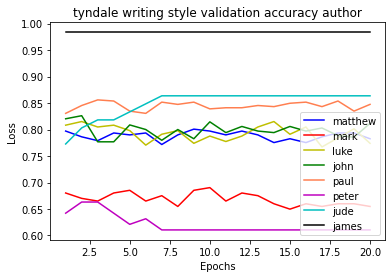

In [113]:
matthewvac = matthewbook.history['val_accuracy']
markvac = markbook.history['val_accuracy']
lukevac = lukebook.history['val_accuracy']
johnvac = johnbook.history['val_accuracy']
paulvac = paul.history['val_accuracy']
petervac = peter.history['val_accuracy']
judevac = jude.history['val_accuracy']
jamesvac = jams.history['val_accuracy']

epochs = range(1, len(matvac) + 1)

plt.plot(epochs, matthewvac, 'b', label='matthew')
plt.plot(epochs, markvac, 'r', label='mark')
plt.plot(epochs, lukevac, 'y', label='luke')
plt.plot(epochs, johnvac, 'g', label='john')
plt.plot(epochs, paulvac, 'coral', label='paul')
plt.plot(epochs, petervac, 'm', label='peter')
plt.plot(epochs, judevac, 'c', label='jude')
plt.plot(epochs, jamesvac, 'k', label='james')

plt.title('tyndale writing style validation accuracy author')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()